# Credit Risk Prediction

## Table of Content
The layout of this documentation is as follows:
- Business Understanding
- Business Objective
    - Problem Statement
    - Objective
- Data Preparation
    - Import Libraries
    - Import Dataset
    - Features Description
- Data Undertanding
    - Statistical Summary
        - Categorical Features
        - Numerical Features
    - Data Types Information
- Data Preprocessing
    - Create the Target Feature
    - EDA
        - Categorical Features Vs Target Feature
        - Numerical Features Vs Target Feature
        - Total Loan Issued Over Time
        - Calculate Total Loss
    - Data Cleansing
        - Detecting Duplication
        - Detecting Missing Values
- Data Modeling
    - Encoding 
    - Feature Selection
    - Handling Imbalanced Data 
    - Data Splitting
    - Normalization
    - Machine Learning Techniques
        - Decision Tree
        - Random Forest
        - Logistic Regression
        - K-Nearest Neighbor
        - Gaussian Naive Bayes
        - MLP Classifier (Neural Network)
        - XGBoost Classifier
        - Gradient Boosting Classifier
    - Model Comparison
- Conclusion

## Business Understanding

When the lending company receives a loan application, the company has to decide whether to approve or reject the loans application based on the applicant’s profile (every decision made has a good or bad risk).
- If the applicant is likely to repay the loan, then declining their application will be a business loss to the company. This situation is called a good risk.
- If the applicant is not likely to repay the loan, then approving their application will be a financial loss to the company. This situation is called a bad risk.

The data contains the information about past loans of applicants and whether they labeled as a good risk or not. When a applicant applies for a loan, there are two type of risks, namely:

1. Good risk consists of Fully Paid, Current, and In Grace Period. Applicants with this label are more likely to get their loan approved in the future.
2. Bad Risk consists of Late, Default, and Charged Off. Applicants with this label are unlikely to get their loan approved in the future.

## Business Objective

**Problem Statement**:

Lending loans to ‘bad risk’ applicants is the largest source of financial loss. Credit loss is the amount of money lost by the lender when the applicant refuses to pay or runs away with the money owed.

**Objectives**:

1. Identify patterns that indicate if a person is unlikely to repay the loan or labeled as a bad risk so that it can be used to take action such as rejecting the loan, reducing the amount of loan, lending at a higher interest rate, etc.
3. Implement machine learning algorithms to build predictive model so that the company can automatically predict whether the loan application submitted by the applicant will labeled as a bad risk or not. With this, the company can make a decision to approve or reject the loan application.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Preparation

### Import Libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # ignores any warning
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

### Import Dataset

In [4]:
# import dataset
df = pd.read_csv('/content/gdrive/MyDrive/Data Science python/RAKAMIN/2. ID X [VIX]/loan_data_2007_2014.csv', sep=',')
print('This dataset has %d rows dan %d columns.\n' % df.shape)
df.head()

This dataset has 466285 rows dan 75 columns.



,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.000000,36 months,10.650000,162.870000,B,B2,NaN,10+ years,RENT,24000.000000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650000,0.000000,Jan-85,1.000000,NaN,NaN,3.000000,0.000000,13648,83.700000,9.000000,f,0.000000,0.000000,5861.071414,5831.780000,5000.000000,861.070000,0.000000,0.000000,0.000000,Jan-15,171.620000,NaN,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.000000,60 months,15.270000,59.830000,C,C4,Ryder,< 1 year,RENT,30000.000000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000000,0.000000,Apr-99,5.000000,NaN,NaN,3.000000,0.000000,1687,9.400000,4.000000,f,0.000000,0.000000,1008.710000,1008.710000,456.460000,435.170000,0.000000,117.080000,1.110000,Apr-13,119.660000,NaN,Sep-13,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.000000,36 months,15.960000,84.330000,C,C5,NaN,10+ years,RENT,12252.000000,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720000,0.000000,Nov-01,2.000000,NaN,NaN,2.000000,0.000000,2956,98.500000,10.000000,f,0.000000,0.000000,3003.653644,3003.650000,2400.000000,603.650000,0.000000,0.000000,0.000000,Jun-14,649.910000,NaN,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.000000,36 months,13.490000,339.310000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000000,0.000000,Feb-96,1.000000,35.000000,NaN,10.000000,0.000000,5598,21.000000,37.000000,f,0.000000,0.000000,12226.302210,12226.300000,10000.000000,2209.330000,16.970000,0.000000,0.000000,Jan-15,357.480000,NaN,Jan-15,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.000000,60 months,12.690000,67.790000,B,B5,University Medical Group,1 year,RENT,80000.000000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940000,0.000000,Jan-96,0.000000,38.000000,NaN,15.000000,0.000000,27783,53.900000,38.000000,f,766.900000,766.900000,3242.170000,3242.170000,2233.100000,1009.070000,0.000000,0.000000,0.000000,Jan-16,67.790000,Feb-16,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 75 features and 466,285 rows which contains the information about past loans of applicants.

The `loan_status` feature defines the past loan status of applicants, which is Current, Fully Paid, Charged Off, Late (16-30 days), Late (31-120 days), In Grace Period, and Default. This feature will be the target feature for credit risk prediction analysis.

#### Features Description

| Features | Description |
| :--- | :--- |
| addr_state |	The state provided by the applicant in the loan application|
| annual_inc |	The self-reported annual income provided by the applicant during registration|
| annual_inc_joint |	The combined self-reported annual income provided by the co-applicants during registration|
| application_type |	Indicates whether the loan is an individual application or a joint application with two co-applicants|
| collection_recovery_fee |	Post charge off collection fee|
| collections_12_mths_ex_med |	Number of collections in 12 months excluding medical collections|
| delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the applicant's credit file for the past 2 years|
| desc |	Loan description provided by the applicant|
| dti |	A ratio calculated using the applicant’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the applicant’s self-reported monthly income|
| dti_joint |	A ratio calculated using the co-applicants' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-applicants' combined self-reported monthly income|
| earliest_cr_line |	The month the applicant's earliest reported credit line was opened|
| emp_length |	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years|
| emp_title | 	The job title supplied by the applicant when applying for the loan |
| fico_range_high |	The upper boundary range the applicant’s FICO at loan origination belongs to |
| fico_range_low |	The lower boundary range the applicant’s FICO at loan origination belongs to |
| funded_amnt |	The total amount committed to that loan at that point in time|
| rec | 	The total amount committed by investors for that loan at that point in time |
| grade |	LC assigned loan grade |
| home_ownership |	The home ownership status provided by the applicant during registration. Our values are: RENT, OWN, MORTGAGE, OTHER |
| id |	A unique LC assigned ID for the loan listing |
| initial_list_status |	The initial listing status of the loan. Possible values are – W, F |
| inq_last_6mths |	The number of inquiries in past 6 months (excluding auto and mortgage inquiries) |
| installment |	The monthly payment owed by the applicant if the loan originates |
| int_rate |	Interest Rate on the loan |
| is_inc_v |	Indicates if income was verified by LC, not verified, or if the income source was verified |
| issue_d |	The month which the loan was funded |
| last_credit_pull_d |	The most recent month LC pulled credit for this loan |
| last_fico_range_high |	The upper boundary range the applicant’s last FICO pulled belongs to |
| last_fico_range_low |	The lower boundary range the applicant’s last FICO pulled belongs to |
| last_pymnt_amnt | Last total payment amount received |
| last_pymnt_d |	Last month payment was received |
| loan_amnt |	Last month payment was received |
| loan_status |	Current status of the loan |
| member_id |	A unique LC assigned Id for the applicant member |
| mths_since_last_delinq |	The number of months since the applicant's last delinquency |
| mths_since_last_major_derog |	Months since most recent 90-day or worse rating |
| mths_since_last_record |	The number of months since the last public record |
| next_pymnt_d |	Next scheduled payment date |
| open_acc |	The number of open credit lines in the applicant's credit file |
| out_prncp |	Remaining outstanding principal for total amount funded |
| out_prncp_inv |	Remaining outstanding principal for portion of total amount funded by investors |
| policy_code | publicly available policy_code=1, new products not publicly available policy_code=2 |
| pub_rec |Number of derogatory public records |
| purpose |	A category provided by the applicant for the loan request |
| pymnt_plan |	Indicates if a payment plan has been put in place for the loan |
| recoveries |	post charge off gross recovery |
| revol_bal |	Total credit revolving balance |
| revol_util |	Revolving line utilization rate, or the amount of credit the applicant is using relative to all available revolving credit |
| sub_grade |	LC assigned loan subgrade |
| term |	The number of payments on the loan. Values are in months and can be either 36 or 60 |
| title |	The loan title provided by the applicant |
| total_acc |	The total number of credit lines currently in the applicant's credit file |
| total_pymnt |	Payments received to date for total amount funded |
| total_pymnt_inv |	Payments received to date for portion of total amount funded by investors |
| total_rec_int |	Interest received to date |
| total_rec_late_fee |	Late fees received to date |
| total_rec_prncp |	Principal received to date |
| url |	URL for the LC page with listing data |
| verified_status_joint |	Indicates if the co-applicants' joint income was verified by LC, not verified, or if the income source was verified |
| zip_code |	The first 3 numbers of the zip code provided by the applicant in the loan application |
| open_acc_6m |	Number of open trades in last 6 months |
| open_il_6m |	Number of currently active installment trades |
| open_il_12m |Number of installment accounts opened in past 12 months |
| open_il_24m |	Number of installment accounts opened in past 24 months |
| mths_since_rcnt_il |	Months since most recent installment accounts opened |
| total_bal_il |	Total current balance of all installment accounts |
| il_util |	Ratio of total current balance to high credit/credit limit on all install acct |
| open_rv_12m |	Number of revolving trades opened in past 12 months |
| open_rv_24m |	Number of revolving trades opened in past 24 months |
| max_bal_bc |	Maximum current balance owed on all revolving accounts |
| all_util |	Balance to credit limit on all trades |
| total_rev_hi_lim |  	Total revolving high credit/credit limit |
| inq_fi |	Number of personal finance inquiries |
| total_cu_tl |	Number of finance trades |
| inq_last_12m |	Number of credit inquiries in past 12 months |
| acc_now_delinq |	The number of accounts on which the applicant is now delinquent |
| tot_coll_amt |	Total collection amounts ever owed |
| vtot_cur_bal |	Total current balance of all accounts |

## Data Understanding

### Statistical Summary

#### Numerical Features

In [5]:
num_features = df.select_dtypes(include=['int64', 'float64'])
print('The number of numerical features is {}'.format(num_features.shape[1]))

The number of numerical features is 53


In [6]:
num_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.000000,233142.000000,134605.029472,0.000000,116571.000000,233142.000000,349713.000000,466284.000000
id,466285.000000,13079729.906182,10893711.624551,54734.000000,3639987.000000,10107897.000000,20731209.000000,38098114.000000
member_id,466285.000000,14597660.622827,11682367.441450,70473.000000,4379705.000000,11941075.000000,23001541.000000,40860827.000000
loan_amnt,466285.000000,14317.277577,8286.509164,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt,466285.000000,14291.801044,8274.371300,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt_inv,466285.000000,14222.329888,8297.637788,0.000000,8000.000000,12000.000000,19950.000000,35000.000000
int_rate,466285.000000,13.829236,4.357587,5.420000,10.990000,13.660000,16.490000,26.060000
installment,466285.000000,432.061201,243.485550,15.670000,256.690000,379.890000,566.580000,1409.990000
annual_inc,466281.000000,73277.381470,54963.568654,1896.000000,45000.000000,63000.000000,88960.000000,7500000.000000
dti,466285.000000,17.218758,7.851121,0.000000,11.360000,16.870000,22.780000,39.990000


- `Unnamed: 0`, `id`, `member_id` are unique for each row. This features will be removed as because it is not needed for analysis.
- `policy_code` has only one unique value. This feature will be removed because no information can be obtained from the this feature.
- There are 17 features that have missing value. This features will be dealt with in the data clansing section.

In [7]:
# drop unnecessary features
df.drop(['Unnamed: 0', 'member_id', 'policy_code'], inplace=True, axis=1)

#### Categorical Features

In [8]:
cat_features = df.select_dtypes(include=['object'])
print('The number of categorical features is {}'.format(cat_features.shape[1]))

The number of categorical features is 22


In [9]:
cat_features.describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


- `emp_title`, `url` ,`desc`, `title`, `zip_code`, and `addr_state` have many unique values. This features will be removed.
- `application_type` has only one unique value. This feature will be removed because no information can be obtained from the this feature.

In [10]:
# drop unnecessary features
df.drop(['emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'application_type'], inplace=True, axis=1)

### Data Types Information

In [11]:
print('Data type before correction:\n')
df.info()

Data type before correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   sub_grade                    466285 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status         

- `issue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, and `last_credit_pull_d` will be converted to datetime format.

In [12]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [13]:
# convert string to datetime
from datetime import datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: date_time(x))
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y') 
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'],format='%b-%y') 
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
df[['earliest_cr_line', 'issue_d', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']].head()

,earliest_cr_line,issue_d,next_pymnt_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,NaT,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,NaT,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,NaT,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,NaT,2015-01-01,2015-01-01
4,1996-01-01,2011-12-01,2016-02-01,2016-01-01,2016-01-01


In [14]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           466285 non-null  int64         
 1   loan_amnt                    466285 non-null  int64         
 2   funded_amnt                  466285 non-null  int64         
 3   funded_amnt_inv              466285 non-null  float64       
 4   term                         466285 non-null  object        
 5   int_rate                     466285 non-null  float64       
 6   installment                  466285 non-null  float64       
 7   grade                        466285 non-null  object        
 8   sub_grade                    466285 non-null  object        
 9   emp_length                   445277 non-null  object        
 10  home_ownership               466285 non-null  object        
 1

## Data Preprocessing

### Create Target Feature

#### Loan Status Description

- **Fully paid** means the loan has been fully repaid, either at the end of the loan term or earlier because of prepayment.

- **Current** means the applicants is making payments on time.

- **In grace period** is a set number of days after the due date during which payment may be made by the applicants without penalty. The exact number of days is determined by each lending company. During this period no late fees are charged, and the delay cannot result in default or cancellation of the loan or contract. In most cases, payment after the due date but during the grace period does not cause a black mark to be added to the applicants’s credit report.

- **Late** means the applicants failed to make a timely payment within the grace period. In this case, grace period days will be counted as late days. Late payments can hurt applicants credit scores, although the impact will depend on applicants overall credit profile and how far behind applicants fall on their payments. Late payments are further broken down by the number of late days.
    - 16-30 days late
    - 31-120 days late


- **Default** means the loan agreement has been terminated by the lending company, and the outstanding balance of the loan is due and payable. Default occurs when a applicants fails to pay back a debt according to the initial arrangement. Defaulting on a loan happens when repayments aren't made for a certain period of time. When a loan defaults, it is sent to a debt collection agency whose job is to contact the applicant and receive the unpaid funds. Defaulting will drastically reduce your credit score, impact your ability to receive future credit, and can lead to the seizure of personal property. 

- **Charged Off** is if applicants been delinquent on their credit card or loan payments for several months. This occurs when the creditor has given up on collecting the money owed and has decided to categorize the debt as bad debt, meaning it is a loss for the company. This is categorized as bad debt. Bad debt means there is no longer a reasonable expectation of further payments on this loan. The bailiff or court has declared no funds can be recovered.

Based on the explanation above, I will create a new feature, namely risk status which consists of 2 classes.
1. **Good Risk** class consists of Fully Paid, Current, and In Grace Period. 
    - This selection is based on the rule that if the applicants is in these period, then the applicant's credit score will not be affected or does not cause a black mark to be added to the applicant's credit report. 
    - This class means that if the applicant applies for a loan again and is likely to repay the loan, then not approving the loan results in a loss of business to the company.
    
    
2. **Bad Risk** class consist of Default, Late, and Charged Off. 
    - It is because if the applicants is in this period, it will affect their credit score so that it can impact their ability to receive future credit.
    - This class means that if the applicant applies for a loan again and is not likely to repay the loan, then approving the loan may lead to a financial loss for the company.

In [15]:
# create target feature
df['risk'] = np.where((df['loan_status'] =='Charged Off') | 
                         (df['loan_status'] =='Default') | 
                         (df['loan_status'] =='Late (31-120 days)') | 
                         (df['loan_status'] =='Late (16-30 days)') | 
                         (df['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),'Bad Risk','Good Risk')

### Exploratory Data Analysis (EDA)

#### Univariate: The Number of Applicants by Loan Status

In [16]:
# table
loan_grp = df.groupby('loan_status').size().reset_index()
loan_grp.columns = ['target','total']
loan_grp['%'] = round(loan_grp['total']*100/sum(loan_grp['total']),2)
loan_grp.sort_values(by='total', ascending=False).style.background_gradient(cmap='Blues')

,target,total,%
1,Current,224226,48.090000
5,Fully Paid,184739,39.620000
0,Charged Off,42475,9.110000
8,Late (31-120 days),6900,1.480000
6,In Grace Period,3146,0.670000
4,Does not meet the credit policy. Status:Fully Paid,1988,0.430000
7,Late (16-30 days),1218,0.260000
2,Default,832,0.180000
3,Does not meet the credit policy. Status:Charged Off,761,0.160000


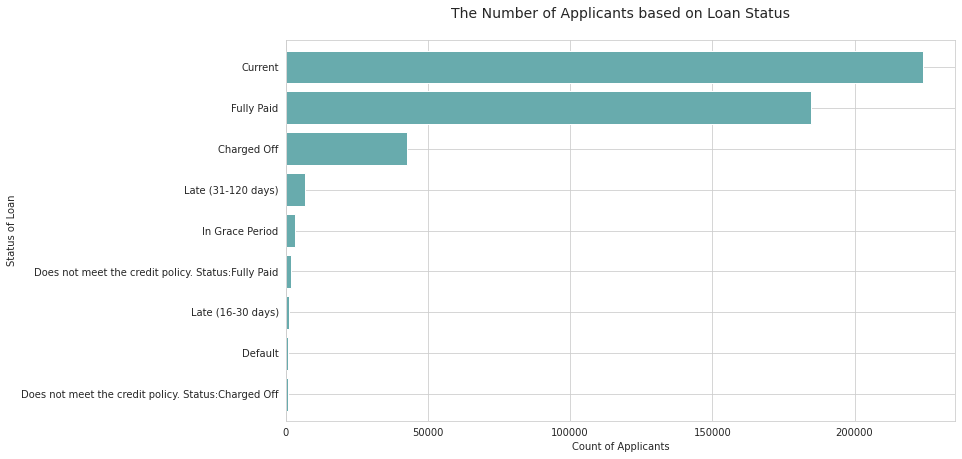

In [17]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
grp = df['loan_status'].value_counts().sort_values(ascending=True)
grp.plot(kind='barh', color='#68abad', width=0.8)
plt.title('The Number of Applicants based on Loan Status\n', fontsize=14)
plt.ylabel('Status of Loan')
plt.xlabel('Count of Applicants')
plt.show()

- There are about 48% which is equal to about 224,226 applicants with loan status of Current, followed by loan status of Fully Paid with 39.6% or equal to 184,739 applicants.

#### Univariate: Target Class Balance

In [18]:
grp_risk = df.groupby('risk').size().reset_index()
grp_risk.columns = ['target','total']
grp_risk['%'] = round(grp_risk['total']*100/sum(grp_risk['total']),2)
grp_risk.sort_values(by='total', ascending=False)

,target,total,%
1,Good Risk,414099,88.810000
0,Bad Risk,52186,11.190000


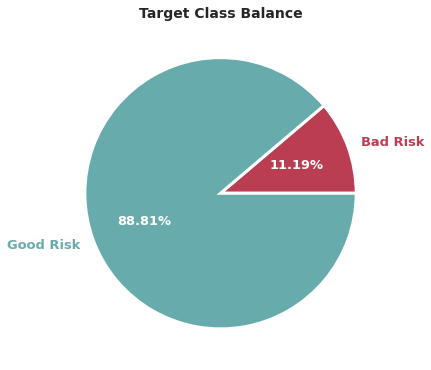

In [19]:
# visualization
sns.set_style('whitegrid')
labels = ['Bad Risk', 'Good Risk']
colors = ["#ba3d51", "#68abad"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = plt.pie(grp_risk['total'], labels=labels, autopct='%.2f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'fontsize': 13})

# for each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=600)
plt.setp(texts, fontweight=600)
ax.set_title('Target Class Balance', fontsize=14, fontweight='bold')
plt.tight_layout()

- It is observed that this dataset is highly imbalanced with the 11% minority class, i.e Bad Risk and 88% majority class, i.e Good Risk.

#### Bivariate Analysis: Categorical Features

In [20]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

##### Bivariate: Risk Status by Term

In [21]:
# in general
df['term'].value_counts(normalize=True)

 36 months   0.724778
 60 months   0.275222
Name: term, dtype: float64

In [22]:
# good risk
grp_term = good.groupby('term').size().reset_index()
grp_term.columns = ['term', 'total']
grp_term['%'] = round(grp_term['total']*100/sum(grp_term['total']),2)
print('Good Risk Status by Term')
grp_term.sort_values(by='total', ascending=False)

Good Risk Status by Term


,term,total,%
0,36 months,304374,73.500000
1,60 months,109725,26.500000


In [23]:
# bad risk
grp_term = bad.groupby('term').size().reset_index()
grp_term.columns = ['term', 'total']
grp_term['%'] = round(grp_term['total']*100/sum(grp_term['total']),2)
print('Bad Risk Status by Term')
grp_term.sort_values(by='total', ascending=False)

Bad Risk Status by Term


,term,total,%
0,36 months,33579,64.340000
1,60 months,18607,35.660000


Text(0.5, 0, '\nTerm')

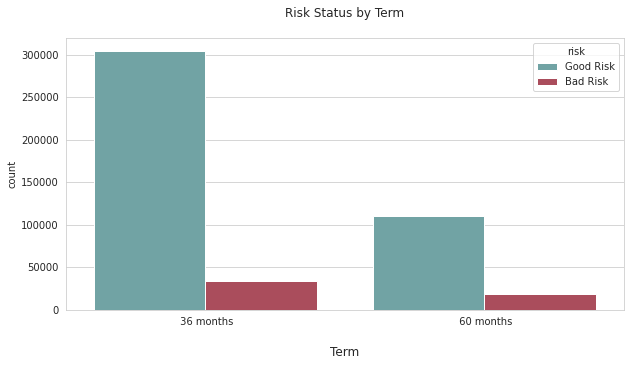

In [24]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#68abad", "#ba3d51"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='term', hue = 'risk')
plt.title('Risk Status by Term\n', fontsize=12)
plt.xlabel('\nTerm', fontsize=12)

- Loan term tell us about the number of payments on the loan.
- There are only two types of loan terms, either 36 months or 60 months. Most of the loans (73%) are shorter, with a term of 36 months.
- Loans with 36 months period are almost twice as likely to bad risk as loans with 60 months period.

##### Bivariate: Risk Status by Verification Status

In [25]:
# in general
df['verification_status'].value_counts(normalize=True)

Verified          0.360413
Source Verified   0.321677
Not Verified      0.317911
Name: verification_status, dtype: float64

In [26]:
# good risk
grp_vs = good.groupby(['verification_status']).size().reset_index()
grp_vs.columns = ['verification_status', 'total']
grp_vs['%'] = round(grp_vs['total']*100/sum(grp_vs['total']),2)
print('Good Risk Status by Verification Status')
grp_vs.sort_values(by='total', ascending=False)

Good Risk Status by Verification Status


,verification_status,total,%
2,Verified,146164,35.300000
0,Not Verified,134032,32.370000
1,Source Verified,133903,32.340000


In [27]:
# bad risk
grp_vs = bad.groupby(['verification_status']).size().reset_index()
grp_vs.columns = ['verification_status', 'total']
grp_vs['%'] = round(grp_vs['total']*100/sum(grp_vs['total']),2)
print('Bad Risk Status by Verification Status')
grp_vs.sort_values(by='total', ascending=False)

Bad Risk Status by Verification Status


,verification_status,total,%
2,Verified,21891,41.950000
1,Source Verified,16090,30.830000
0,Not Verified,14205,27.220000


Text(0.5, 0, '\nVerification Status')

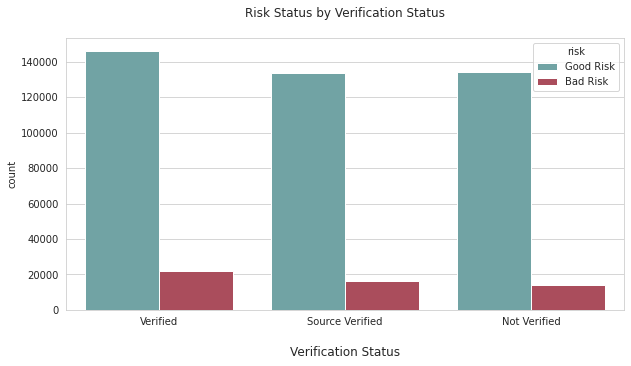

In [28]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#68abad", "#ba3d51"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='verification_status', hue = 'risk')
plt.title('Risk Status by Verification Status\n', fontsize=12)
plt.xlabel('\nVerification Status', fontsize=12)

- Verification status tell us whether the income was verified by the company, not verified, or if the income source was verified.
- Most of the income has had its verified by the company (36%) although 31% were not verified.

##### Bivariate: Risk Status by Payment Plan

In [29]:
# replace
df['pymnt_plan'] = df['pymnt_plan'].replace(['n','y'],['No','Yes'])

In [30]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [31]:
# in general
df['pymnt_plan'].value_counts(normalize=True)

No    0.999981
Yes   0.000019
Name: pymnt_plan, dtype: float64

In [32]:
# good risk
grp_pp = good.groupby(['pymnt_plan']).size().reset_index()
grp_pp.columns = ['pymnt_plan', 'total']
grp_pp['%'] = round(grp_pp['total']*100/sum(grp_pp['total']),2)
print('Good Risk Status by Payment Plan')
grp_pp.sort_values(by='total', ascending=False)

Good Risk Status by Payment Plan


,pymnt_plan,total,%
0,No,414095,100.000000
1,Yes,4,0.000000


In [33]:
# bad risk
grp_pp = bad.groupby(['pymnt_plan']).size().reset_index()
grp_pp.columns = ['pymnt_plan', 'total']
grp_pp['%'] = round(grp_pp['total']*100/sum(grp_pp['total']),2)
print('Bad Risk Status by Payment Plan')
grp_pp.sort_values(by='total', ascending=False)

Bad Risk Status by Payment Plan


,pymnt_plan,total,%
0,No,52181,99.990000
1,Yes,5,0.010000


Text(0.5, 0, '\nPayment Plan')

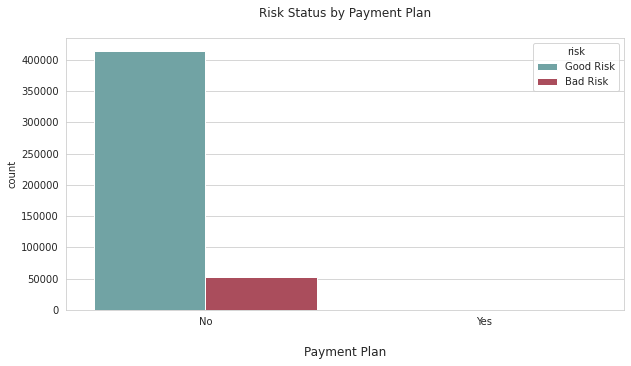

In [34]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#68abad", "#ba3d51"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='pymnt_plan', hue = 'risk')
plt.title('Risk Status by Payment Plan\n', fontsize=12)
plt.xlabel('\nPayment Plan', fontsize=12)

- Payment plan indicates if a payment plan has been put in place for the loan.
- Most all of the applicants does not prepare a payment plan for the loan (99%), which means they do not have a clear repayment plan. It's interesting that only 9 applicants prepare a payment plan.

##### Bivariate: Risk Status by Initial List Status

In [35]:
# replace
df['initial_list_status'] = df['initial_list_status'].replace(['w','f'],['Whole Loan','Fractional Loan'])

In [36]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [37]:
# in general
df['initial_list_status'].value_counts(normalize=True)

Fractional Loan   0.649828
Whole Loan        0.350172
Name: initial_list_status, dtype: float64

In [38]:
# good risk
grp_ils = good.groupby(['initial_list_status']).size().reset_index()
grp_ils.columns = ['initial_list_status', 'total']
grp_ils['%'] = round(grp_ils['total']*100/sum(grp_ils['total']),2)
print('Good Risk Status by Initial List Status')
grp_ils.sort_values(by='total', ascending=False)

Good Risk Status by Initial List Status


,initial_list_status,total,%
0,Fractional Loan,265883,64.210000
1,Whole Loan,148216,35.790000


In [39]:
# bad risk
grp_ils = bad.groupby(['initial_list_status']).size().reset_index()
grp_ils.columns = ['initial_list_status', 'total']
grp_ils['%'] = round(grp_ils['total']*100/sum(grp_ils['total']),2)
print('Bad Risk Status by Initial List Status')
grp_ils.sort_values(by='total', ascending=False)

Bad Risk Status by Initial List Status


,initial_list_status,total,%
0,Fractional Loan,37122,71.130000
1,Whole Loan,15064,28.870000


Text(0.5, 0, '\nInitial List Status')

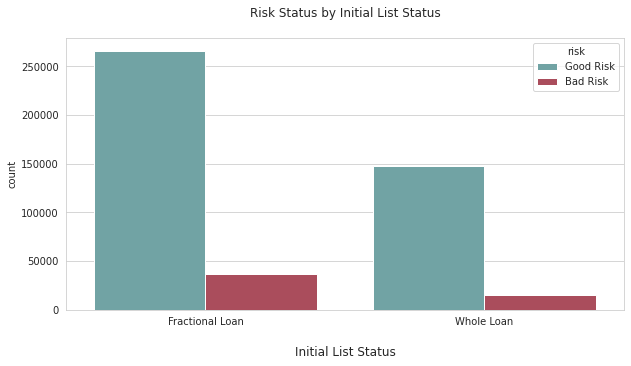

In [40]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#68abad", "#ba3d51"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='initial_list_status', hue = 'risk')
plt.title('Risk Status by Initial List Status\n', fontsize=12)
plt.xlabel('\nInitial List Status', fontsize=12)

- Initial list status tell us about the initial listing status of the loan. 
- There are only two types of initial list status, either W (Whole loan) or F (Fractional loan). This has to do with whether the creditor provided the entire loan or if the loan is across multiple creditor.
- Most of the loan is fractional loans (64%).

##### Bivariate: Risk Status by Purpose

In [41]:
# in general
df['purpose'].value_counts(normalize=True)

debt_consolidation   0.588042
credit_card          0.223376
home_improvement     0.056912
other                0.050806
major_purchase       0.021077
small_business       0.015040
car                  0.011574
medical              0.009870
moving               0.006421
vacation             0.005334
wedding              0.005025
house                0.004866
educational          0.000905
renewable_energy     0.000753
Name: purpose, dtype: float64

In [42]:
# bad risk
grp_p = good.groupby(['purpose']).size().reset_index()
grp_p.columns = ['purpose', 'total']
grp_p['%'] = round(grp_p['total']*100/sum(grp_p['total']),2)
print('Good Risk by Purpose')
grp_p.sort_values(by='total', ascending=False)

Good Risk by Purpose


,purpose,total,%
2,debt_consolidation,242359,58.530000
1,credit_card,94957,22.930000
4,home_improvement,23865,5.760000
9,other,20351,4.910000
6,major_purchase,8866,2.140000
11,small_business,5467,1.320000
0,car,4909,1.190000
7,medical,3978,0.960000
8,moving,2529,0.610000
12,vacation,2182,0.530000


In [43]:
# bad risk
grp_p = bad.groupby(['purpose']).size().reset_index()
grp_p.columns = ['purpose', 'total']
grp_p['%'] = round(grp_p['total']*100/sum(grp_p['total']),2)
print('Bad Risk by Purpose')
grp_p.sort_values(by='total', ascending=False)

Bad Risk by Purpose


,purpose,total,%
2,debt_consolidation,31836,61.000000
1,credit_card,9200,17.630000
9,other,3339,6.400000
4,home_improvement,2672,5.120000
11,small_business,1546,2.960000
6,major_purchase,962,1.840000
7,medical,624,1.200000
0,car,488,0.940000
8,moving,465,0.890000
5,house,322,0.620000


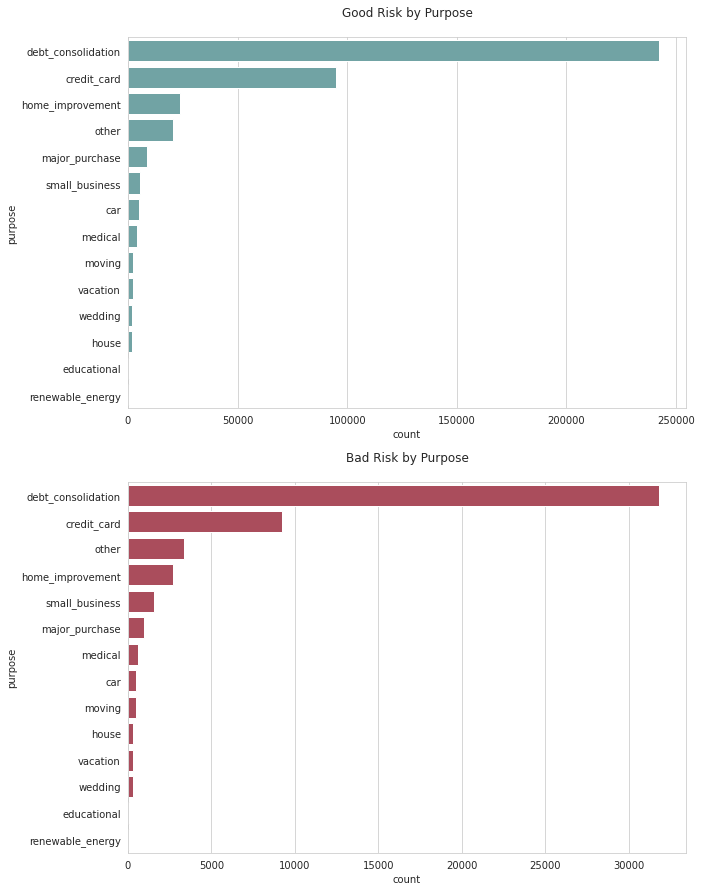

In [44]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, y='purpose', 
              color = '#68abad', 
              order = good['purpose'].value_counts().index, 
              ax=ax[0])
ax[0].set_title('Good Risk by Purpose\n', fontsize=12)

sns.countplot(data = bad, y='purpose',
              color = '#ba3d51', 
              order = bad['purpose'].value_counts().index, 
              ax=ax[1])
ax[1].set_title('Bad Risk by Purpose\n', fontsize=12)

plt.show()

- The purpose feature is a category provided by the applicant's for the loan request. There are 13 categories. 
- There are over half of the loans (58%) were for debt consolidation. Other significant categories were credit card and home improvement.
- Only 0.1% of loans for renewable energy have bad risk status, but 61% of debt consolidation loans have bad risk status.

##### Bivariate: Risk Status by Home Ownership

In [45]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [46]:
# reduce the number of categories of home ownership
def func(row):
    if row['home_ownership'] == 'MORTGAGE':
        val = 'MORTGAGE'
    elif (row['home_ownership'] == 'RENT'):
        val ='RENT'
    elif (row['home_ownership'] == 'OWN'):
        val ='OWN'
    else:
        val ='OTHERS'
    return val

df['home_ownership'] = df.apply(func, axis=1)

The **ANY** and **NONE** labels on the `home_ownership` feature can be combined with the **OTHER** label.

In [47]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [48]:
# in general
df['home_ownership'].value_counts(normalize=True)

MORTGAGE   0.505860
RENT       0.404201
OWN        0.089439
OTHERS     0.000500
Name: home_ownership, dtype: float64

In [49]:
# good risk
grp_ho = good.groupby(['home_ownership']).size().reset_index()
grp_ho.columns = ['home_ownership', 'total']
grp_ho['%'] = round(grp_ho['total']*100/sum(grp_ho['total']),2)
print('Good Risk Status by Home Ownership')
grp_ho.sort_values(by='total', ascending=False)

Good Risk Status by Home Ownership


,home_ownership,total,%
0,MORTGAGE,212628,51.350000
3,RENT,164223,39.660000
2,OWN,37061,8.950000
1,OTHERS,187,0.050000


In [50]:
# bad risk
grp_ho = bad.groupby(['home_ownership']).size().reset_index()
grp_ho.columns = ['home_ownership', 'total']
grp_ho['%'] = round(grp_ho['total']*100/sum(grp_ho['total']),2)
print('Bad Risk Status by Home Ownership')
grp_ho.sort_values(by='total', ascending=False)

Bad Risk Status by Home Ownership


,home_ownership,total,%
3,RENT,24250,46.470000
0,MORTGAGE,23247,44.550000
2,OWN,4643,8.900000
1,OTHERS,46,0.090000


Text(0.5, 0, '\nHome Ownership')

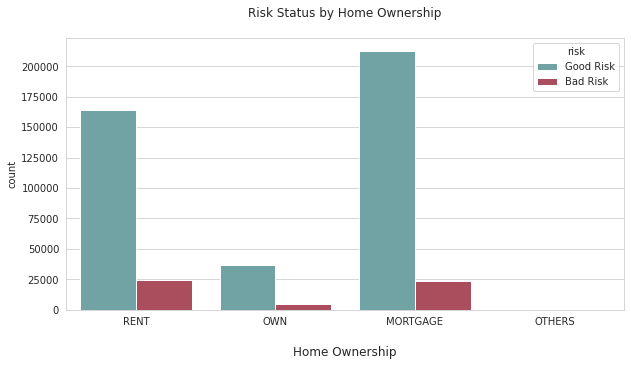

In [51]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#68abad", "#ba3d51"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='home_ownership', hue = 'risk')
plt.title('Risk Status by Home Ownership\n', fontsize=12)
plt.xlabel('\nHome Ownership', fontsize=12)

- The home ownership feature is category provided by the applicant's during registration.
- Most applicants have an existing mortgage (50%) or are currently renting a home (40%).
- Applicants who have an existing mortgage or are currently renting a home have a higher probability of bad risk.

##### Bivariate: Risk Status by Grade

In [52]:
# in general
df['grade'].value_counts(normalize=True)

B   0.293659
C   0.268705
D   0.164895
A   0.160561
E   0.076685
F   0.028371
G   0.007124
Name: grade, dtype: float64

In [53]:
# good risk
grp_g = good.groupby(['grade']).size().reset_index()
grp_g.columns = ['grade', 'total']
grp_g['%'] = round(grp_g['total']*100/sum(grp_g['total']),2)
print('Good Risk by Grade')
grp_g.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
1,B,125921,30.410000
2,C,110550,26.700000
0,A,71912,17.370000
3,D,64756,15.640000
4,E,28618,6.910000
5,F,9962,2.410000
6,G,2380,0.570000


In [54]:
# bad risk
grp_g = bad.groupby(['grade']).size().reset_index()
grp_g.columns = ['grade', 'total']
grp_g['%'] = round(grp_g['total']*100/sum(grp_g['total']),2)
print('Good Risk by Grade')
grp_g.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
2,C,14743,28.250000
3,D,12132,23.250000
1,B,11008,21.090000
4,E,7139,13.680000
5,F,3267,6.260000
0,A,2955,5.660000
6,G,942,1.810000


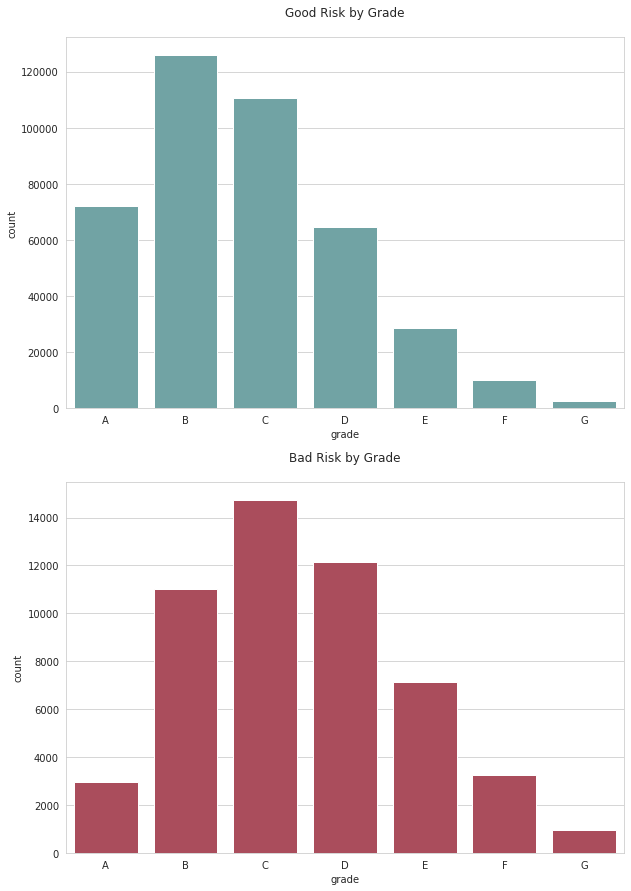

In [55]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, x='grade', 
              color = '#68abad', 
              order=sorted(good['grade'].unique()), 
              ax=ax[0])
ax[0].set_title('Good Risk by Grade\n', fontsize=12)

sns.countplot(data = bad, x='grade',
              color = '#ba3d51', 
              order=sorted(bad['grade'].unique()), 
              ax=ax[1])
ax[1].set_title('Bad Risk by Grade\n', fontsize=12)

plt.show()

- Grade feature tell us about assigned loan grade by lending company. There are 7 different grades from A to G. 
- Most of the loans are graded B (29.3%). There are about 72%  loan are graded C and above, and less than 1% of the loans are graded G.

##### Bivariate: Risk Status by Sub-Grade

In [56]:
# in general
df['sub_grade'].value_counts(normalize=True).head()

B3   0.067954
B4   0.065421
C1   0.057804
C2   0.057347
B2   0.057068
Name: sub_grade, dtype: float64

In [57]:
# good risk
grp_sg = good.groupby(['sub_grade']).size().reset_index()
grp_sg.columns = ['sub_grade', 'total']
grp_sg['%'] = round(grp_sg['total']*100/sum(grp_sg['total']),2)
print('Good Risk by Sub-Grade')
grp_sg.sort_values(by='total', ascending=False)
grp_sg.head()

Good Risk by Sub-Grade


,sub_grade,total,%
0,A1,10332,2.500000
1,A2,10636,2.570000
2,A3,12121,2.930000
3,A4,18191,4.390000
4,A5,20632,4.980000


In [58]:
# bad risk
grp_sg = bad.groupby(['sub_grade']).size().reset_index()
grp_sg.columns = ['sub_grade', 'total']
grp_sg['%'] = round(grp_sg['total']*100/sum(grp_sg['total']),2)
print('Bad Risk by Sub-Grade')
grp_sg.sort_values(by='total', ascending=True)
grp_sg.head()

Bad Risk by Sub-Grade


,sub_grade,total,%
0,A1,209,0.400000
1,A2,320,0.610000
2,A3,447,0.860000
3,A4,854,1.640000
4,A5,1125,2.160000


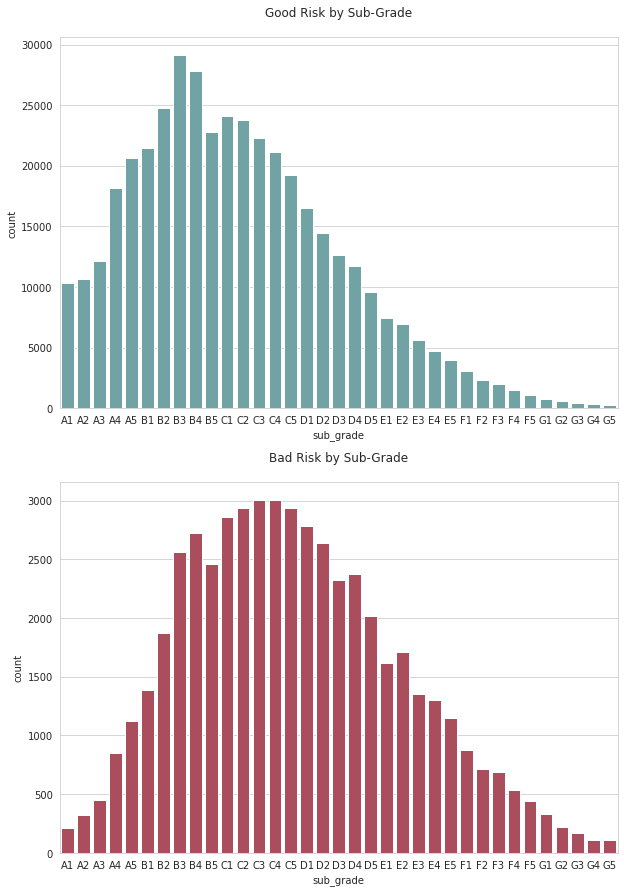

In [59]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, x='sub_grade', 
              color = '#68abad', 
              order=sorted(good['sub_grade'].unique()),
              ax=ax[0])
ax[0].set_title('Good Risk by Sub-Grade\n', fontsize=12)

sns.countplot(data = bad, x='sub_grade',
              color = '#ba3d51', 
              order=sorted(bad['sub_grade'].unique()),
              ax=ax[1])
ax[1].set_title('Bad Risk by Sub-Grade\n', fontsize=12)

plt.show()

##### Bivariate: Risk Status by Employment Length

In [60]:
# in general
df['emp_length'].value_counts(normalize=True)

10+ years   0.336979
2 years     0.092915
3 years     0.082187
< 1 year    0.081444
5 years     0.069112
1 year      0.066525
4 years     0.062934
7 years     0.058795
6 years     0.058642
8 years     0.050295
9 years     0.040173
Name: emp_length, dtype: float64

In [61]:
# table
grp_el = good.groupby(['emp_length']).size().reset_index()
grp_el.columns = ['emp_length', 'total']
grp_el['%'] = round(grp_el['total']*100/sum(grp_el['total']),2)
print('Good Risk by Employment Length')
grp_el.sort_values(by='total', ascending=False)

Good Risk by Employment Length


,emp_length,total,%
1,10+ years,134724,34.030000
2,2 years,36726,9.280000
3,3 years,32488,8.210000
10,< 1 year,31838,8.040000
5,5 years,27163,6.860000
0,1 year,26236,6.630000
4,4 years,24872,6.280000
7,7 years,23201,5.860000
6,6 years,22996,5.810000
8,8 years,19880,5.020000


In [62]:
# bad risk
grp_el = bad.groupby(['emp_length']).size().reset_index()
grp_el.columns = ['emp_length', 'total']
grp_el['%'] = round(grp_el['total']*100/sum(grp_el['total']),2)
print('Bad Risk by Employment Length')
grp_el.sort_values(by='total', ascending=False)

Bad Risk by Employment Length


,emp_length,total,%
1,10+ years,15325,31.070000
2,2 years,4647,9.420000
10,< 1 year,4427,8.970000
3,3 years,4108,8.330000
5,5 years,3611,7.320000
0,1 year,3386,6.860000
4,4 years,3151,6.390000
6,6 years,3116,6.320000
7,7 years,2979,6.040000
8,8 years,2515,5.100000


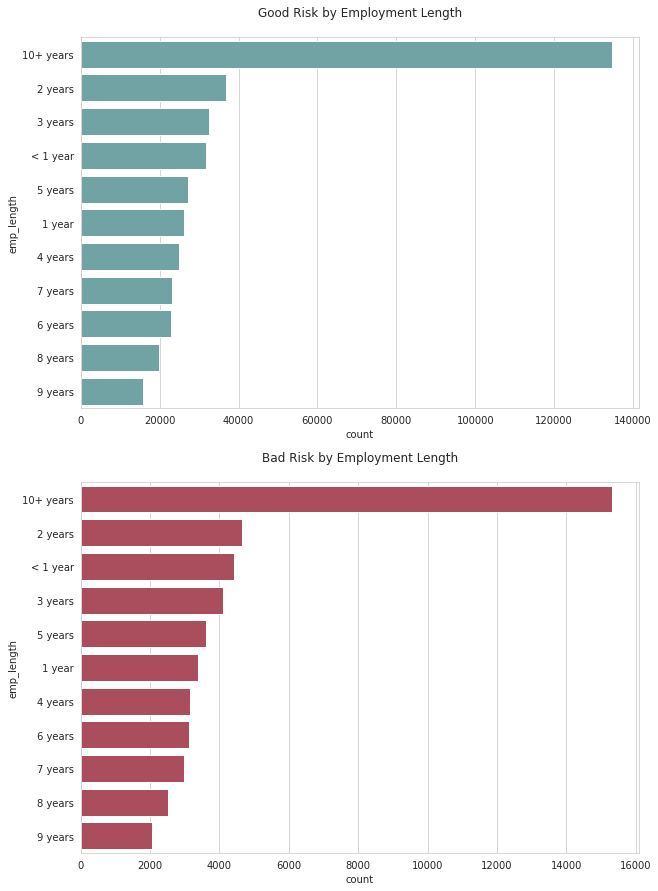

In [63]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, y='emp_length', 
              color = '#68abad', 
              order = good['emp_length'].value_counts().index, 
              ax=ax[0])
ax[0].set_title('Good Risk by Employment Length\n', fontsize=12)

sns.countplot(data = bad, y='emp_length',
              color = '#ba3d51', 
              order = bad['emp_length'].value_counts().index, 
              ax=ax[1])
ax[1].set_title('Bad Risk by Employment Length\n', fontsize=12)

plt.show()

- There are 11 levels, from < 1 year, 1 year, through to 10+ years.
- Applicant's employment length falls into 2 big class: the most frequent is applicants with 10+ years of experience (33.7%), the other is applicants with < 3 years of working experience (32.3%).

#### Bivariate Analysis: Numerical Features

In [64]:
def plot_var(col_name, full_name, continuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # plot without risk status
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # plot with risk status
    if continuous:
        sns.boxplot(x=col_name, y='risk', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Risk Status')
    else:
        bad_rates = df.groupby(col_name)['risk'].value_counts(normalize=True).loc[:,'Bad Risk']
        sns.barplot(x=bad_rates.index, y=bad_rates.values, saturation=1, ax=ax2)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

##### Bivariate: Risk Status by Loan Amount

In [65]:
# in general
df['loan_amnt'].describe()

count   466285.000000
mean     14317.277577
std       8286.509164
min        500.000000
25%       8000.000000
50%      12000.000000
75%      20000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [66]:
# breakdown per risk status
df.groupby('risk')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.000000,14624.953053,8390.633508,500.000000,8000.000000,12800.000000,20000.000000,35000.000000
Good Risk,414099.000000,14278.503389,8272.492476,500.000000,8000.000000,12000.000000,20000.000000,35000.000000


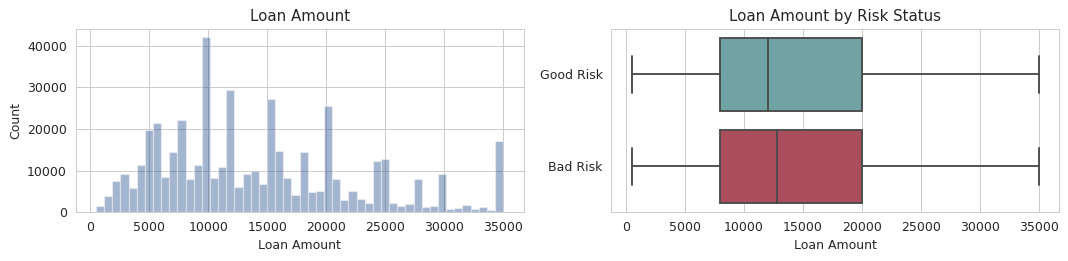

In [67]:
# visualization
plot_var('loan_amnt', 'Loan Amount', continuous=True)

- The range of loan amount is from \\$500 to \$35,000 with a median of \\$12,000.
- The median of the applicants with bad risk is slightly higher than the applicants with good risk. It means bad risk loans tend to have higher loan amounts.

##### Bivariate: Risk Status by Interest Rate

In [68]:
# in general
df['int_rate'].describe()

count   466285.000000
mean        13.829236
std          4.357587
min          5.420000
25%         10.990000
50%         13.660000
75%         16.490000
max         26.060000
Name: int_rate, dtype: float64

In [69]:
# breakdown per risk status
df.groupby('risk')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.000000,15.973031,4.256379,5.420000,13.050000,15.610000,18.850000,26.060000
Good Risk,414099.000000,13.559068,4.294915,5.420000,10.490000,13.350000,16.290000,26.060000


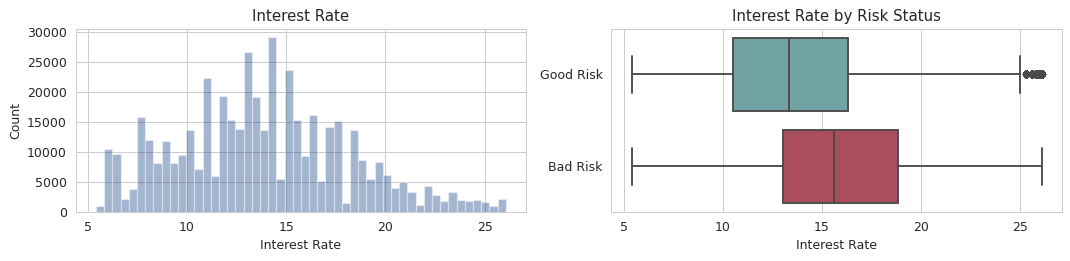

In [70]:
# visualization
plot_var('int_rate', 'Interest Rate', continuous=True)

- The range of interest rates on the loans is from 5.42% to 26.06% with a median of 13.6%
- Bad risk loans tend to have higher interest rates. It means applicants with the high interest rate have a high chance of not being able to repay the loan.

##### Bivariate: Risk Status by Installment

In [71]:
# in general
df['installment'].describe()

count   466285.000000
mean       432.061201
std        243.485550
min         15.670000
25%        256.690000
50%        379.890000
75%        566.580000
max       1409.990000
Name: installment, dtype: float64

In [72]:
# breakdown per risk status
df.groupby('risk')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.000000,442.587052,246.432087,15.910000,266.995000,392.500000,574.400000,1408.130000
Good Risk,414099.000000,430.734701,243.079648,15.670000,255.040000,377.880000,565.180000,1409.990000


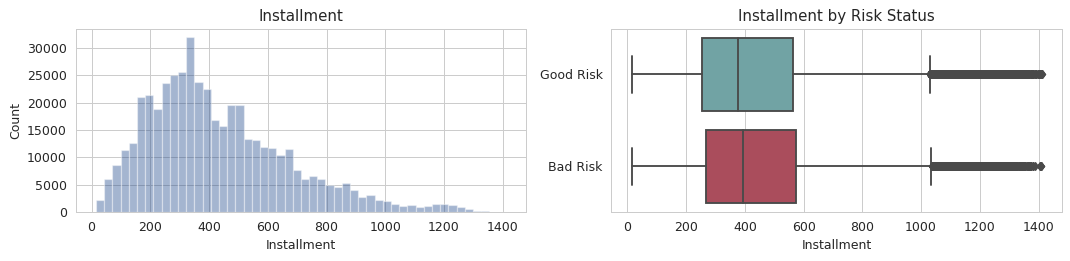

In [73]:
# visualization
plot_var('installment', 'Installment', continuous=True)

- The range of installments is from \\$15.67 to \$1,409.99 per month with a median of \\$379.89 per month.
- The median of the applicants with bad risk is slightly higher than the applicants with good risk. It means bad risk loans tend to have higher installments.

##### Bivariate: Risk Status by Annual Income

In [74]:
# in general
df['annual_inc'].describe()

count    466281.000000
mean      73277.381470
std       54963.568654
min        1896.000000
25%       45000.000000
50%       63000.000000
75%       88960.000000
max     7500000.000000
Name: annual_inc, dtype: float64

In [75]:
# breakdown per risk status
df.groupby('risk')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.000000,65615.836951,41219.446894,2000.000000,41000.000000,57000.000000,80000.000000,1250000.000000
Good Risk,414095.000000,74242.921654,56384.984019,1896.000000,45000.000000,64000.000000,90000.000000,7500000.000000


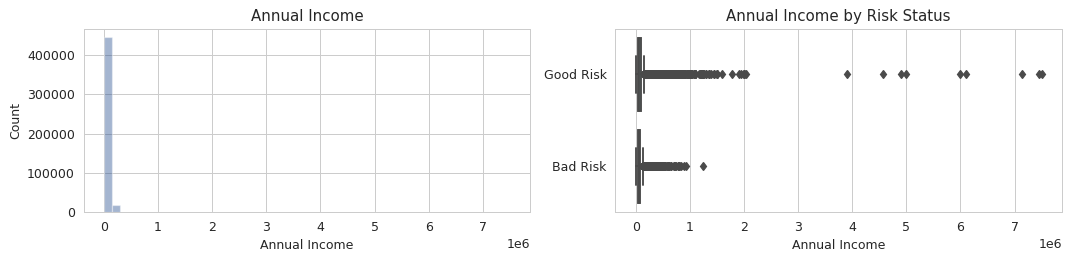

In [76]:
# visualization
plot_var('annual_inc', 'Annual Income', continuous=True)

- The range of annual income of applicants is from \$1,896 to \$7,500,000 with a median of \\$63,000
- It appears that applicants with higher income are more likely to repay their loans.

##### Bivariate: Risk Status by Recoveries

In [77]:
# in general
df['recoveries'].describe()

count   466285.000000
mean        85.344211
std        552.216084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      33520.270000
Name: recoveries, dtype: float64

In [78]:
# breakdown per risk status
df.groupby('risk')['recoveries'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.000000,762.555581,1486.036802,0.000000,0.000000,0.000000,999.762500,33520.270000
Good Risk,414099.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


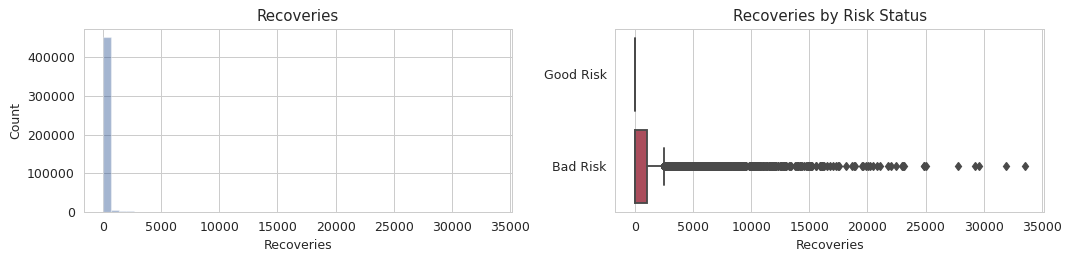

In [79]:
# visualization
plot_var('recoveries', 'Recoveries', continuous=True)

- The range of recoveries is from \\$0 to \$33,520 with a median of \\$0
- The bad risk loans tend to have recoveries value greater than 0. It means applicants with a recoveries value greater than 0 have a high chance of not being able to repay the loans. While applicants who are likely to repay the loan have a recoveries value of 0. 

##### Bivariate: Risk Status by Collection Recovery Fee

In [80]:
# in general
df['collection_recovery_fee'].describe()

count   466285.000000
mean         8.961534
std         85.491437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

In [81]:
# breakdown per risk status
df.groupby('risk')['collection_recovery_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.000000,80.071836,244.154672,0.000000,0.000000,0.000000,18.000000,7002.190000
Good Risk,414099.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


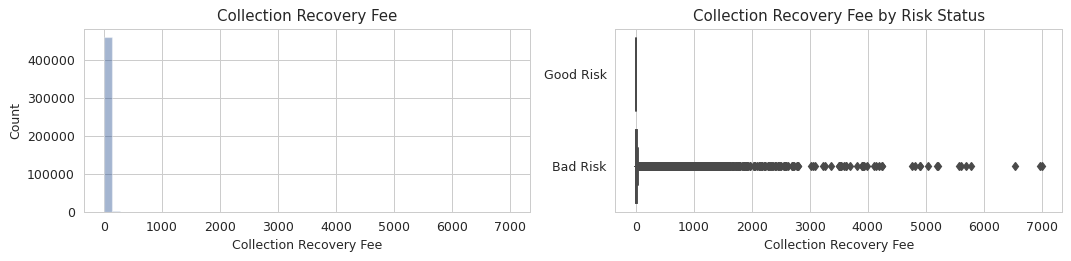

In [82]:
# visualization
plot_var('collection_recovery_fee', 'Collection Recovery Fee', continuous=True)

- The range of collection recovery fee is from \\$0 to \$7,002 with a median of \\$0
- The bad risk loans tend to have collection recovery fee greater than 0. It means applicants with a collection recovery fee greater than 0 have a high chance of not being able to repay the loans. While applicants who are likely to repay the loan have a collection recovery fee of 0. 

##### Bivariate: Risk Status by Total Principal Received

In [83]:
# in general
df['total_rec_prncp'].describe()

count   466285.000000
mean      8866.014657
std       7031.687997
min          0.000000
25%       3708.560000
50%       6817.760000
75%      12000.000000
max      35000.030000
Name: total_rec_prncp, dtype: float64

In [84]:
# breakdown per risk status
df.groupby('risk')['total_rec_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.000000,3829.815241,3581.790642,0.000000,1411.555000,2790.015000,5078.055000,34483.270000
Good Risk,414099.000000,9500.691637,7103.511739,273.660000,4214.910000,7500.000000,12481.370000,35000.030000


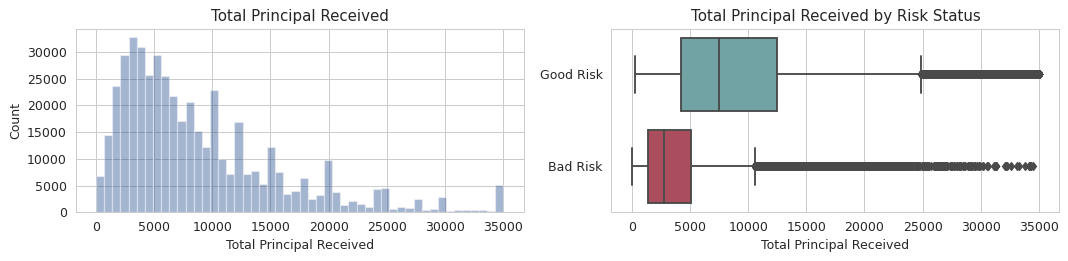

In [85]:
# visualization
plot_var('total_rec_prncp', 'Total Principal Received', continuous=True)

- The range of total principal received is from \\$0 to \$35,000 with a median of \\$6,817
- Bad risk loans tend to have lower principal received. It means applicants with low principal received are unlikely to repay the loan.

##### Bivariate: Risk Status by Last Payment Amount

In [86]:
# in general
df['last_pymnt_amnt'].describe()

count   466285.000000
mean      3123.913796
std       5554.737393
min          0.000000
25%        312.620000
50%        545.960000
75%       3187.510000
max      36234.440000
Name: last_pymnt_amnt, dtype: float64

In [87]:
# breakdown per risk status
df.groupby('risk')['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.000000,461.319145,617.624970,0.000000,245.792500,381.500000,575.120000,34833.350000
Good Risk,414099.000000,3459.461973,5804.263471,0.000000,323.380000,588.080000,4272.305000,36234.440000


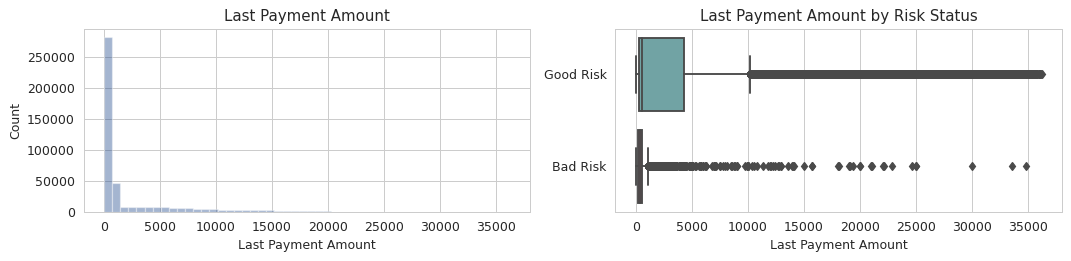

In [88]:
# visualization
plot_var('last_pymnt_amnt', 'Last Payment Amount', continuous=True)

- The range of the last payment amount is from \\$0 to \$36,234 with a median of \\$545.96
- Bad risk loans tend to have a lower amount of last payment. It means applicants with a low last payment amount are unlikely to repay the loan.

##### The Remaining Numerical Features

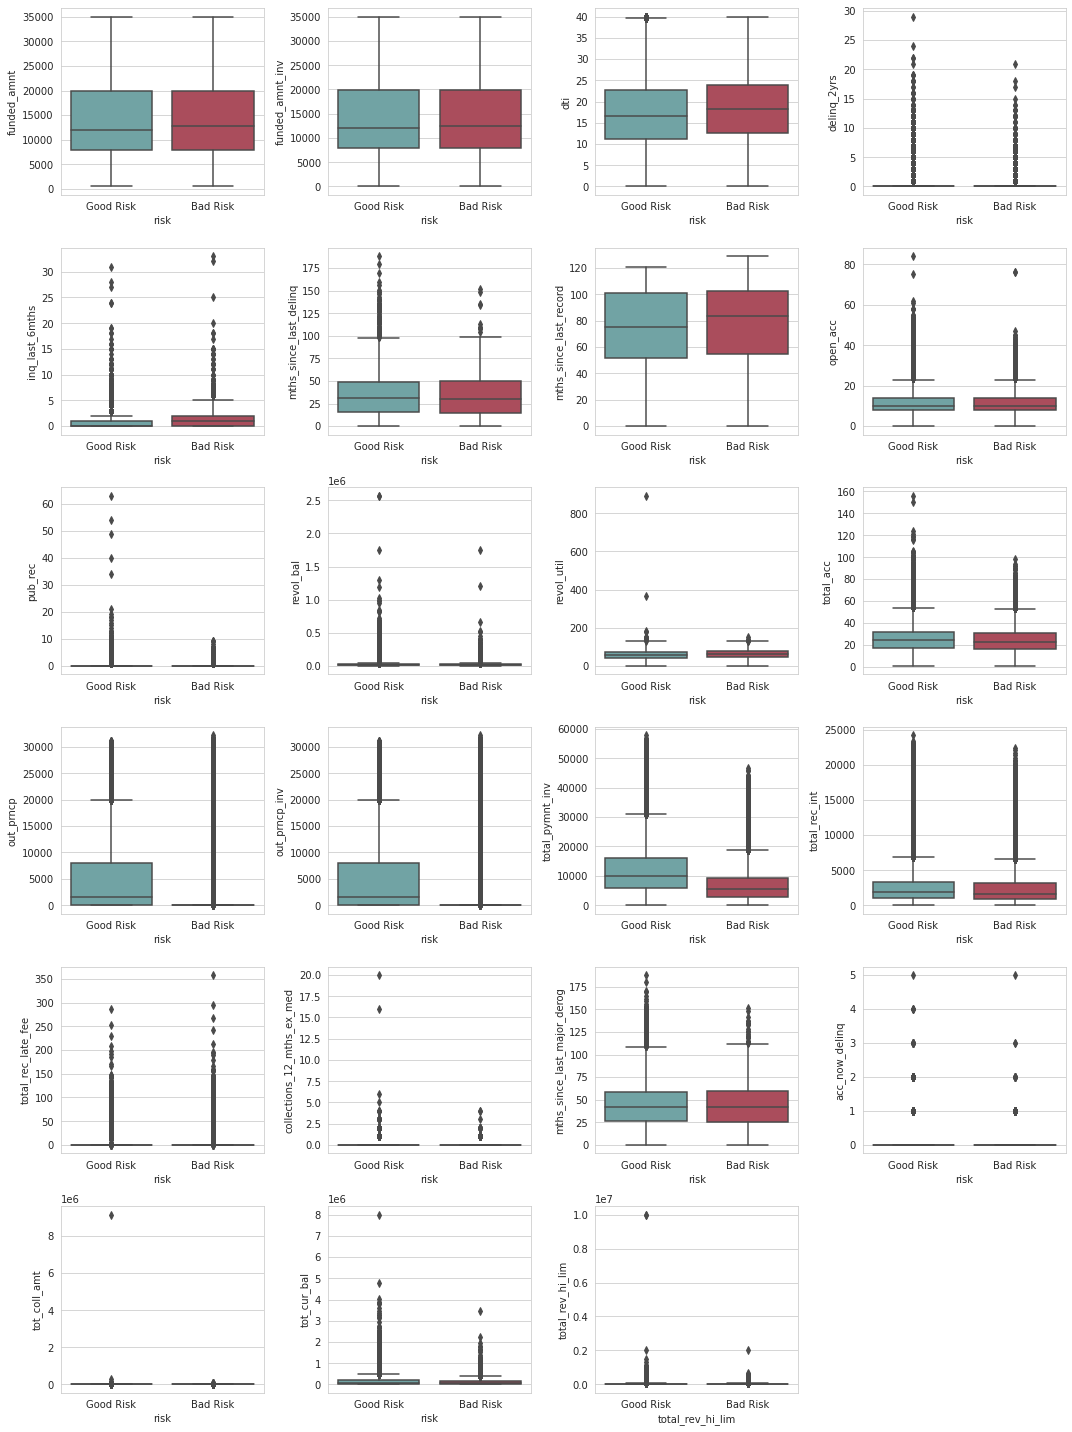

In [89]:
num = ['funded_amnt', 'funded_amnt_inv','dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee','collections_12_mths_ex_med', 
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# visualization
fig = plt.figure(figsize=(15,20))

for i in range(0, len(num)):
    plt.subplot(6,4,i+1)
    sns.boxplot(y=df[num[i]], x=df['risk'])
plt.xlabel(num[i])
plt.tight_layout()
plt.show()

##### Bivariate: Total Loan Issued Over Time

In [90]:
df1 = df.copy()

In [91]:
df1["issue_d_year"] = df1["issue_d"].dt.strftime('%Y')
issue_agg = df1.groupby(["issue_d_year"])[["id"]].nunique()
issue_agg.rename(columns={"id": "count"}, inplace=True)
issue_agg.reset_index(inplace=True)
issue_agg

,issue_d_year,count
0,2007,603
1,2008,2393
2,2009,5281
3,2010,12537
4,2011,21721
5,2012,53367
6,2013,134755
7,2014,235628


In [92]:
def plot_df(df, x, y, title="", xlabel='issue_d_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

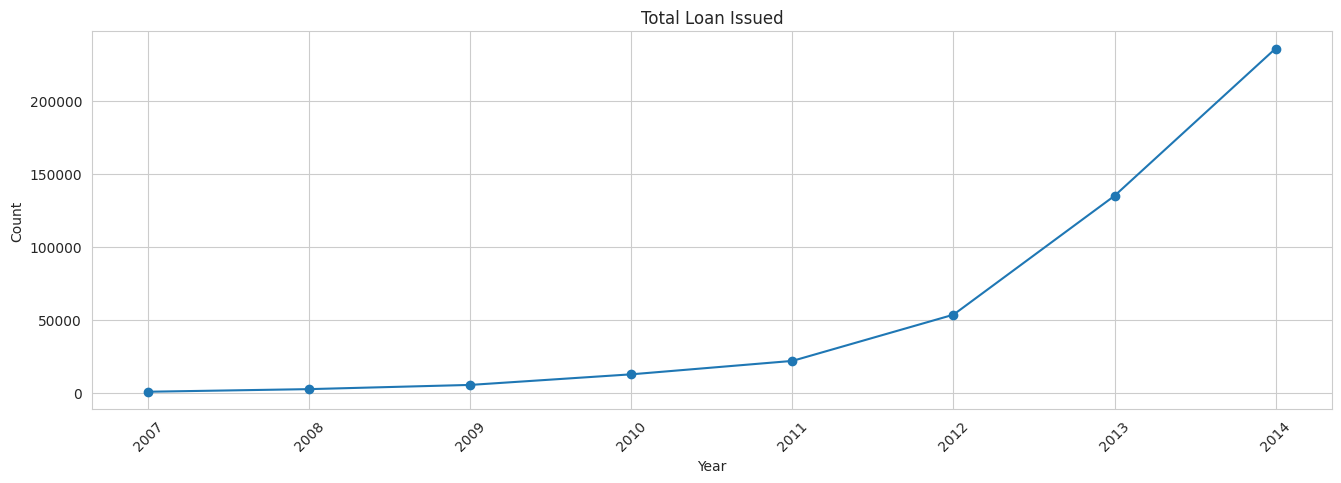

In [93]:
plot_df(issue_agg, x=issue_agg['issue_d_year'], y=issue_agg["count"], title="Total Loan Issued", xlabel='Year', ylabel = "Count")

- Total loans issued increase from year to year. The highest occurred in 2014, with 235,628 loans issued by the lending company.
- The highest increase also occurred from 2013 to 2014, which is 100,873 loan increases.

###### Per Risk Status

In [94]:
# table
issue_agg2 = df1.groupby(['issue_d_year', 'risk'])[["id"]].count()
issue_agg2.rename(columns={'id': 'count'}, inplace=True)
issue_agg2.reset_index(inplace=True)
issue_agg2 = issue_agg2.pivot(index=['issue_d_year'], columns='risk', values='count').reset_index()
issue_agg2 = issue_agg2.reset_index(drop=True).rename_axis(None, axis=1)
issue_agg2

,issue_d_year,Bad Risk,Good Risk
0,2007,158,445
1,2008,496,1897
2,2009,723,4558
3,2010,1761,10776
4,2011,3270,18451
5,2012,8361,45006
6,2013,17118,117637
7,2014,20299,215329


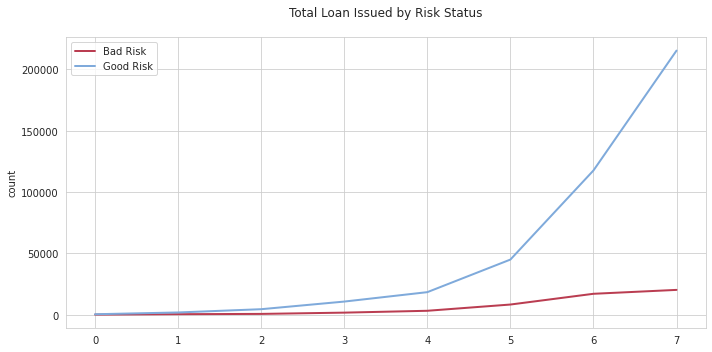

In [95]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,5))
issue_agg2.plot(kind='line', ax=ax, lw=2,
                color=['#ba3d51', '#7faadb'])

ax.set_title('Total Loan Issued by Risk Status\n',
        fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('count')
plt.tight_layout()
plt.show()

In [96]:
def plot_df(df, x, y, title="", xlabel='issue_d_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

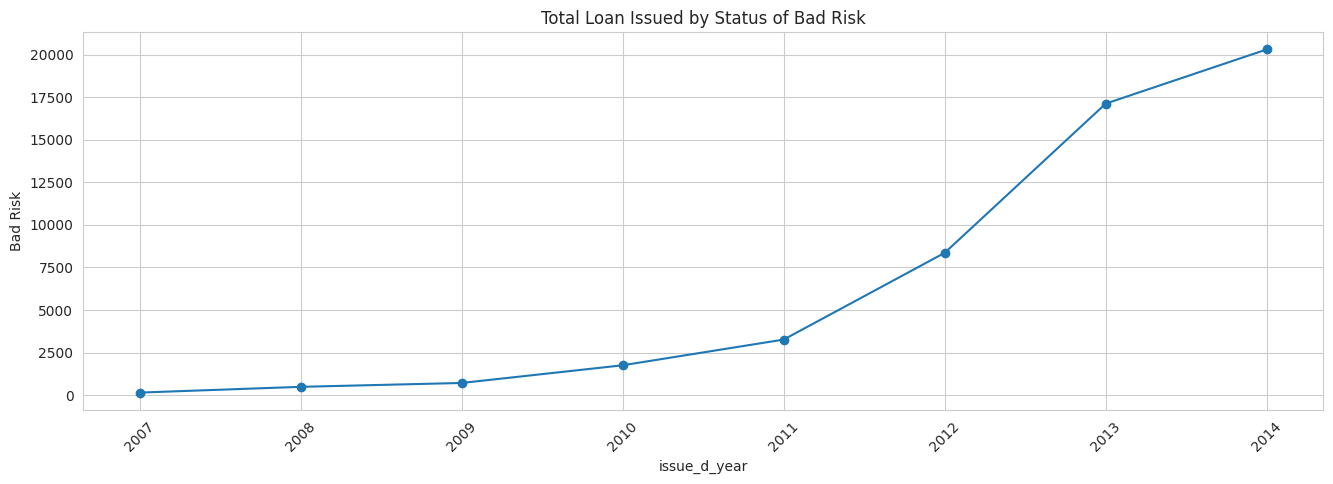

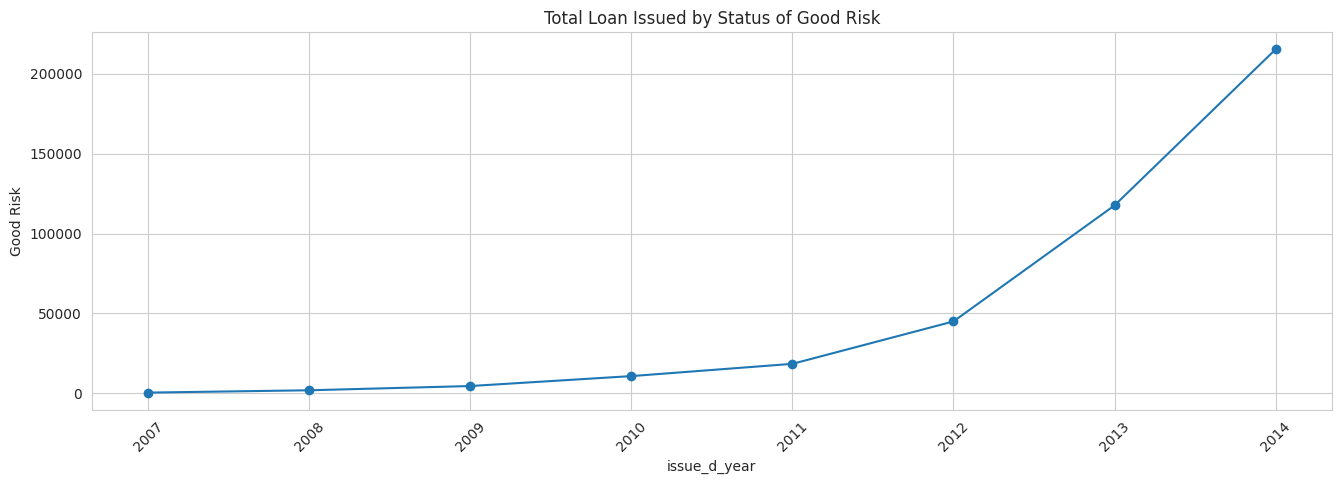

In [97]:
for i in issue_agg2.columns:
  if i != 'issue_d_year':
    plot_df(issue_agg2, x=issue_agg2['issue_d_year'], y=issue_agg2[i], title='Total Loan Issued by Status of ' + i, ylabel = i)

- The number of loans that have bad risks also increases from year to year. The highest increase occurred from 2012 to 2013, which is 8,757 increases.

##### Bivariate: Total Credit Line Opened Over Time

In [98]:
df1["earliest_cr_line_year"] = df1["earliest_cr_line"].dt.strftime('%Y')
cline_agg = df1.groupby(["earliest_cr_line_year"])[["id"]].nunique()
cline_agg.rename(columns={"id": "count"}, inplace=True)
cline_agg.reset_index(inplace=True)
cline_agg

,earliest_cr_line_year,count
0,1944,1
1,1946,2
2,1948,1
3,1949,1
4,1950,4
5,1951,3
6,1953,3
7,1954,4
8,1955,7
9,1956,6


In [99]:
def plot_df(df, x, y, title="", xlabel='earliest_cr_line_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

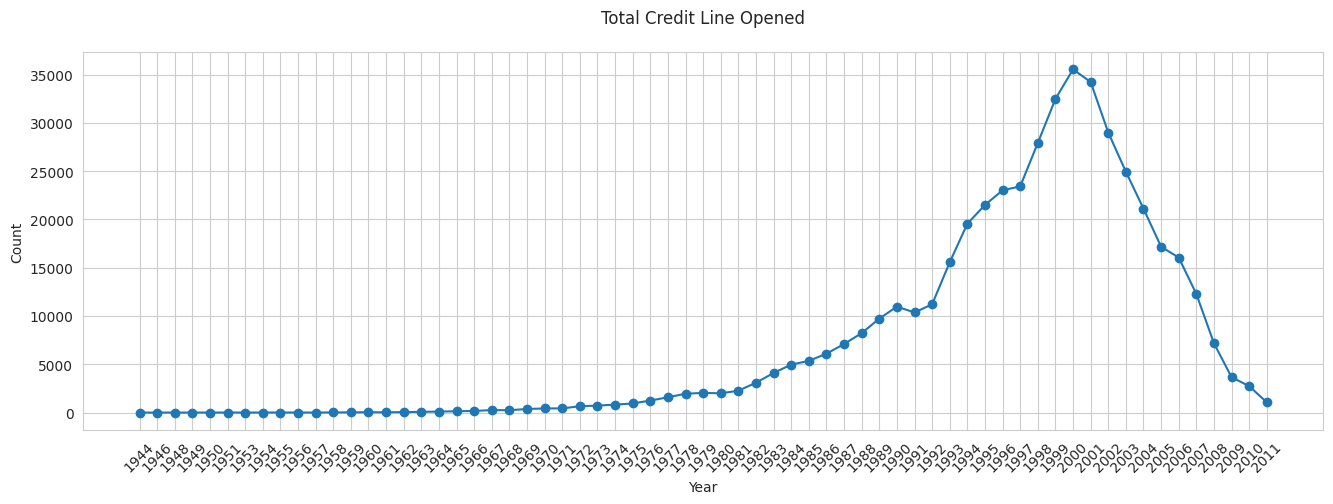

In [100]:
plot_df(cline_agg, x=cline_agg['earliest_cr_line_year'], y=cline_agg["count"], title="Total Credit Line Opened\n", xlabel='Year', ylabel = "Count")

- Highest number occurred in 2000 with 35,539 lines of credit open. However, after that, the number of credit lines opened continued to decrease.

#### Calculate the Total Loss Suffered by the Company

In [101]:
# choose only bad risk loans
bad.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
1,1077430,2500,2500,2500.000000,60 months,15.270000,59.830000,C,C4,< 1 year,RENT,30000.000000,Source Verified,2011-12-01,Charged Off,No,car,1.000000,0.000000,1999-04-01,5.000000,NaN,NaN,3.000000,0.000000,1687,9.400000,4.000000,Fractional Loan,0.000000,0.000000,1008.710000,1008.710000,456.460000,435.170000,0.000000,117.080000,1.110000,2013-04-01,119.660000,NaT,2013-09-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
8,1071795,5600,5600,5600.000000,60 months,21.280000,152.390000,F,F2,4 years,OWN,40000.000000,Source Verified,2011-12-01,Charged Off,No,small_business,5.550000,0.000000,2004-04-01,2.000000,NaN,NaN,11.000000,0.000000,5210,32.600000,13.000000,Fractional Loan,0.000000,0.000000,646.020000,646.020000,162.020000,294.940000,0.000000,189.060000,2.090000,2012-04-01,152.390000,NaT,2012-08-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
9,1071570,5375,5375,5350.000000,60 months,12.690000,121.450000,B,B5,< 1 year,RENT,15000.000000,Verified,2011-12-01,Charged Off,No,other,18.080000,0.000000,2004-09-01,0.000000,NaN,NaN,2.000000,0.000000,9279,36.500000,3.000000,Fractional Loan,0.000000,0.000000,1476.190000,1469.340000,673.480000,533.420000,0.000000,269.290000,2.520000,2012-11-01,121.450000,NaT,2013-03-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
12,1064687,9000,9000,9000.000000,36 months,13.490000,305.380000,C,C1,< 1 year,RENT,30000.000000,Source Verified,2011-12-01,Charged Off,No,debt_consolidation,10.080000,0.000000,2004-04-01,1.000000,NaN,NaN,4.000000,0.000000,10452,91.700000,9.000000,Fractional Loan,0.000000,0.000000,2270.700000,2270.700000,1256.140000,570.260000,0.000000,444.300000,4.160000,2012-07-01,305.380000,NaT,2012-11-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
14,1069057,10000,10000,10000.000000,36 months,10.650000,325.740000,B,B2,3 years,RENT,100000.000000,Source Verified,2011-12-01,Charged Off,No,other,7.060000,0.000000,1991-05-01,2.000000,NaN,NaN,14.000000,0.000000,11997,55.500000,29.000000,Fractional Loan,0.000000,0.000000,7471.990000,7471.990000,5433.470000,1393.420000,0.000000,645.100000,6.314500,2013-10-01,325.740000,NaT,2014-03-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk


In [102]:
# calculate total loan to be paid
def word_strip(x):
  return x.strip()
  
bad['term'] = bad['term'].apply(lambda x: word_strip(x))
bad['term'] = bad['term'].replace(['60 months', '36 months'],[60,36])
bad['must_pay'] = bad['term'] * bad['installment']

- `installment` : The monthly payment owed by the applicants if the loan originates.
- `term` : The number of payments on the loan.

In [103]:
# calculate the remaining loan to be paid
bad['remain_pay'] = bad['must_pay'] - (bad['total_pymnt'] + bad['total_rec_late_fee'] + bad['collection_recovery_fee'])

- `collection_recovery_fee` : Post charge off collection fee.
- `total_pymnt` : Payments received to date for total amount funded.
- `total_rec_late_fee` : Late fees received to date.

In [104]:
# total applicants and loss
print('The number of applicants is', bad['id'].count())
print('Total loss suffered by the company is', bad['remain_pay'].sum())

The number of applicants is 52186
Total loss suffered by the company is 687949073.4686067


- In general, the lending company has the possibility to suffer a loss of 687 million from 52,186 applicants.

In [105]:
bad1 = bad.copy()

In [106]:
# reduce the number of categories of home ownership
def func(row):
    if row['loan_status'] == 'Charged Off':
        val = 'Charged Off'
    elif (row['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'):
        val ='Charged Off'
    elif (row['loan_status'] == 'Late (16-30 days)'):
        val ='Late'
    elif (row['loan_status'] == 'Late (31-120 days)'):
        val ='Late'
    else:
        val ='Default'
    return val

bad1['loan_status'] = bad.apply(func, axis=1)

In [107]:
# total loss per loan status
loss_agg= bad1.groupby(['loan_status']).agg({"remain_pay" : 'sum', 'id' : 'count'}).reset_index()
loss_agg.columns = ['loan status','total loss', 'total applicant']
loss_agg['% total loss'] = round(loss_agg['total loss']*100/sum(loss_agg['total loss']),2)
loss_agg['avg loss'] = (loss_agg['total loss'])/(loss_agg['total applicant'])
loss_agg.sort_values(by='total loss', ascending=False)

,loan status,total loss,total applicant,% total loss,avg loss
0,Charged Off,574356330.270452,43236,83.490000,13284.215244
2,Late,102293296.616078,8118,14.870000,12600.800273
1,Default,11299446.582076,832,1.640000,13581.065603


- It is observed that the loan status of charged off is the biggest source of loss (83%) for the lending company.

##### Breakdown: Loan Status of Charged Off

In this period, the applicants have been delinquent on their credit card or loan payments for several months, and the creditor has given up on collecting the money owed by the applicants, which means it is a loss for the lending company. There is no longer a reasonable expectation of further payments on this loan.

In [108]:
bad_co = bad.loc[bad['loan_status'].isin(['Does not meet the credit policy. Status:Charged Off', 'Charged Off'])]
bad_co.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
90558,7265014,9000,9000,9000.000000,36,11.990000,298.890000,B,B3,1 year,RENT,48000.000000,Not Verified,2013-09-01,Charged Off,No,debt_consolidation,17.300000,0.000000,2006-08-01,1.000000,63.000000,NaN,9.000000,0.000000,2170,22.800000,20.000000,Whole Loan,0.000000,0.000000,5997.580000,5997.580000,3851.060000,1230.070000,0.000000,916.450000,164.961000,2015-02-01,298.890000,NaT,2015-07-01,0.000000,63.000000,NaN,NaN,NaN,0.000000,0.000000,20674.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9500.000000,NaN,NaN,NaN,Bad Risk,10760.040000,4597.499000


In [109]:
# total applicants and loss
print('The number of applicants is', bad_co['id'].count())
print('Total loss suffered by the company is', bad_co['remain_pay'].sum())

The number of applicants is 43236
Total loss suffered by the company is 574356330.2704517


- The lending company has suffered a loss of 574 million from 43,236 applicants.

##### Breakdown: Loan Status of Late

In this period, the applicants failed to make a timely payment within the grace period. Late payments can hurt applicants credit scores, although the impact will depend on applicants overall credit profile and how far behind applicants fall on their payments.

In [110]:
bad_lt = bad.loc[bad['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)'])]
bad_lt.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
376554,17695694,13200,13200,13200.000000,60,16.290000,323.040000,D,D2,3 years,MORTGAGE,110000.000000,Verified,2014-06-01,Late (31-120 days),No,debt_consolidation,34.490000,1.000000,1984-04-01,1.000000,19.000000,NaN,13.000000,0.000000,10096,78.900000,27.000000,Whole Loan,10824.640000,10824.640000,4845.600000,4845.600000,2375.360000,2470.240000,0.000000,0.000000,0.000000,2015-09-01,323.040000,2016-02-01,2016-01-01,0.000000,19.000000,NaN,NaN,NaN,0.000000,0.000000,176400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12800.000000,NaN,NaN,NaN,Bad Risk,19382.400000,14536.800000


In [111]:
# total applicants and loss
print('The number of applicants is', bad_lt['id'].count())
print('Total loss suffered by the company is', bad_lt['remain_pay'].sum())

The number of applicants is 8118
Total loss suffered by the company is 102293296.61607844


- The lending company has the potential to suffer losses of around 102 million from 8,118 applicants if the company does not immediately collect the overdue accounts.

##### Breakdown: Loan Status of Default

In this period, the loan agreement has been terminated by the lending company, and the outstanding balance of the loan is due and payable. Defaulting on a loan happens when repayments aren't made for a certain period of time. When a loan defaults, it is sent to a debt collection agency whose job is to contact the applicant and receive the unpaid funds. Defaulting will drastically reduce your credit score, impact your ability to receive future credit, and can lead to the seizure of personal property. 

In [112]:
bad_df = bad[bad['loan_status'] == 'Default']
bad_df.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
342727,20739217,20000,20000,20000.000000,60,14.490000,470.470000,C,C4,7 years,OWN,140000.000000,Source Verified,2014-07-01,Default,No,debt_consolidation,23.960000,0.000000,2002-04-01,1.000000,64.000000,NaN,10.000000,0.000000,39289,82.400000,26.000000,Whole Loan,16742.210000,16742.210000,6204.700000,6204.700000,3257.790000,2923.390000,23.520000,0.000000,0.000000,2015-08-01,1500.000000,2016-02-01,2016-01-01,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,381762.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47700.000000,NaN,NaN,NaN,Bad Risk,28228.200000,21999.980000


In [113]:
# total applicants and loss
print('The number of applicants is', bad_df['id'].count())
print('Total loss suffered by the company is', bad_df['remain_pay'].sum())

The number of applicants is 832
Total loss suffered by the company is 11299446.58207646


- The lending company has the potential to suffer losses of around 11 million from 832 applicants if the company does not immediately contact the applicants and receive the unpaid funds.

### Data Cleansing

#### Drop Unnecessary Columns

In [114]:
df.drop(['id'], inplace= True, axis=1)
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
437049,7200,7200,7175.000000,36 months,8.900000,228.630000,A,A5,6 years,MORTGAGE,106252.000000,Source Verified,2014-02-01,Fully Paid,No,credit_card,6.910000,1.000000,1999-01-01,0.000000,9.000000,NaN,7.000000,0.000000,27028,59.700000,25.000000,Fractional Loan,0.000000,0.000000,7731.020000,7704.180000,7200.000000,531.020000,0.000000,0.000000,0.000000,2015-02-01,5444.720000,NaT,2016-01-01,1.000000,9.000000,NaN,NaN,NaN,0.000000,0.000000,369799.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45300.000000,NaN,NaN,NaN,Good Risk


#### Detecting Duplication

In [115]:
print('Duplication status:', df.duplicated().values.any())
print('The number of duplication is:', df.duplicated().sum())

Duplication status: False
The number of duplication is: 0


#### Detecting Missing Values

In [116]:
# check for missing values
print('Missing values status:', df.isnull().values.any())
percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_df = pd.DataFrame({'data type':dtypes,
                                 '%': percent_mv})
mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

Missing values status: True


,data type,%
open_il_24m,float64,100.000000
verification_status_joint,float64,100.000000
dti_joint,float64,100.000000
open_il_12m,float64,100.000000
open_il_6m,float64,100.000000
mths_since_rcnt_il,float64,100.000000
total_bal_il,float64,100.000000
il_util,float64,100.000000
annual_inc_joint,float64,100.000000
open_rv_12m,float64,100.000000


In [117]:
# drop features that have large number of missing values (> 50%)
df.drop(df.iloc[:, 47:64], inplace=True, axis=1)
df.drop(['verification_status_joint','dti_joint', 
         'annual_inc_joint', 'mths_since_last_record', 
         'mths_since_last_major_derog', 'mths_since_last_delinq'], inplace=True, axis=1)

In [118]:
# check for missing values
print('Missing values status:', df.isnull().values.any())
percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_df = pd.DataFrame({'data type':dtypes,
                                 '%': percent_mv})
mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

Missing values status: True


,data type,%
next_pymnt_d,datetime64[ns],48.728567
emp_length,object,4.505399
last_pymnt_d,datetime64[ns],0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,datetime64[ns],0.009007
pub_rec,float64,0.006219
delinq_2yrs,float64,0.006219
open_acc,float64,0.006219
inq_last_6mths,float64,0.006219


<AxesSubplot:xlabel='acc_now_delinq', ylabel='Density'>

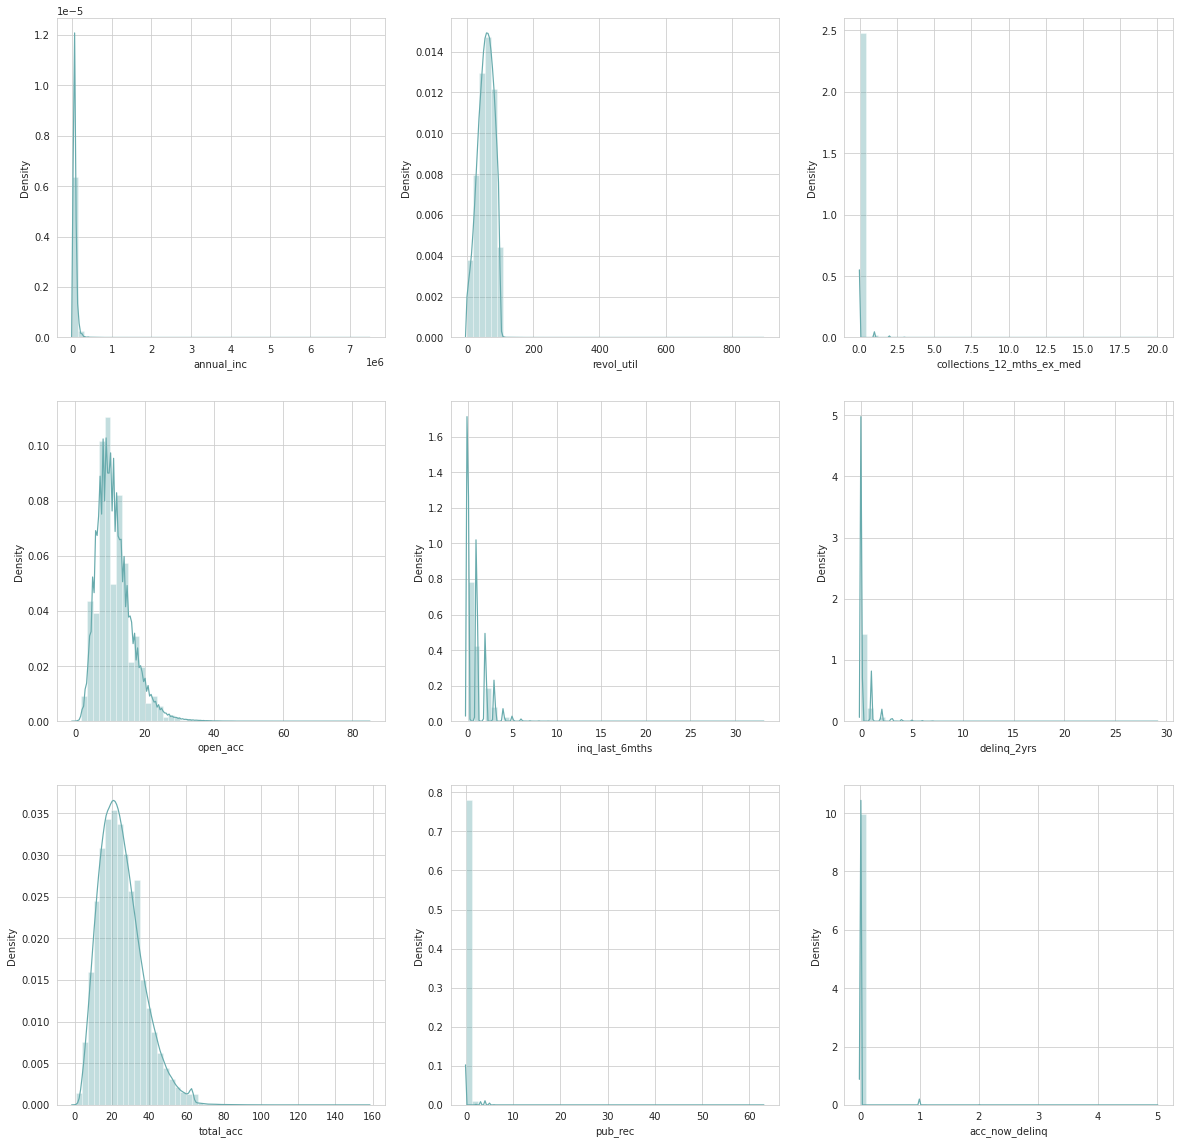

In [119]:
# distribution of numerical features that have missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3, figsize=(20,20))
sns.set_context('paper', font_scale=1)

sns.distplot(df['annual_inc'], ax=ax[0][0])
sns.distplot(df['revol_util'], ax=ax[0][1])
sns.distplot(df['collections_12_mths_ex_med'], ax=ax[0][2])
sns.distplot(df['open_acc'], ax=ax[1][0])
sns.distplot(df['inq_last_6mths'], ax=ax[1][1])
sns.distplot(df['delinq_2yrs'], ax=ax[1][2])
sns.distplot(df['total_acc'], ax=ax[2][0])
sns.distplot(df['pub_rec'], ax=ax[2][1])
sns.distplot(df['acc_now_delinq'], ax=ax[2][2])

- The distribution of numerical features that mentioned above is skewed, so the missing values in those features will be imputed with their median.

In [120]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

cat_columns = df.select_dtypes(include=['object','datetime64[ns]']).columns.tolist()
num_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cat_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].median())

In [121]:
# after imputation
print('Missing values status:', df.isnull().values.any())

Missing values status: False


## Building a Model

### Drop Unnecessary Feature

I will drop the loan status feature because it is not needed in the analysis. For prediction, I will use the risk feature as the target feature.

In [122]:
df.drop(['loan_status'], inplace=True, axis=1)

### Create a New Feature from Date Type Features

I will separate these features into days, months and years.
- `issue_d` : The month which the loan was funded.
- `earliest_cr_line` : The month the applicant's earliest reported credit line was opened.
- `last_pymnt_d` : Last month payment was received.
- `next_pymnt_d` : Next scheduled payment date.
- `last_credit_pull_d` : The most recent month LC pulled credit for this loan.

In [123]:
df["issue_d_year"] = df["issue_d"].dt.year
df["issue_d_month"] = df["issue_d"].dt.month
df["issue_d_day"] = df["issue_d"].dt.day

df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month
df["earliest_cr_line_day"] = df["earliest_cr_line"].dt.day

df["last_pymnt_d_year"] = df["last_pymnt_d"].dt.year
df["last_pymnt_d_month"] = df["last_pymnt_d"].dt.month
df["last_pymnt_d_day"] = df["last_pymnt_d"].dt.day

df["next_pymnt_d_year"] = df["next_pymnt_d"].dt.year
df["next_pymnt_d_month"] = df["next_pymnt_d"].dt.month
df["next_pymnt_d_day"] = df["next_pymnt_d"].dt.day

df["last_credit_pull_d_year"] = df["last_credit_pull_d"].dt.year
df["last_credit_pull_d_month"] = df["last_credit_pull_d"].dt.month
df["last_credit_pull_d_day"] = df["last_credit_pull_d"].dt.day

In [124]:
# drop the original
df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], inplace=True, axis=1)

In [125]:
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,risk,issue_d_year,issue_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day
269468,24000,24000,24000.000000,60 months,13.980000,558.190000,C,C3,4 years,MORTGAGE,126000.000000,Source Verified,No,debt_consolidation,9.040000,1.000000,0.000000,4.000000,2.000000,3196,79.900000,11.000000,Whole Loan,19790.180000,19790.180000,7796.020000,7796.020000,4209.820000,3586.200000,0.000000,0.000000,0.000000,558.190000,0.000000,0.000000,Good Risk,2014,10,1,1988,12,1,2016,1,1,2016,1,1,2016,1,1


### Encoding

There are 2 options in converting categorical features to numeric, namely label encoding and one hot encoding.
1. Apply **One Hot Encoding** when:
    - The categorical feature is not ordinal.
    - The number of categorical features is less so one-hot encoding can be effectively applied.


2. Apply **Label Encoding** when:
    - The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
    - The number of categories is quite large as one-hot encoding can lead to high memory consumption.

In [126]:
df.select_dtypes(include='object').columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status',
 'risk']

#### One Hot Encoding

`home_ownership`, `verification_status`, `pymnt_plan`, `purpose`, `initial_list_status` will be encoded using one hot encoding because these features is non-ordinal data.

In [127]:
df_1 = df.drop(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'], axis=1)
cat_1 = df[['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']]

In [129]:
from sklearn.preprocessing import OneHotEncoder
oho = OneHotEncoder(sparse=False)

df_encoded = pd.DataFrame(oho.fit_transform(cat_1))
#df_encoded.columns = oho.get_feature_names(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'])
df_encoded.columns = oho.get_feature_names_out(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'])
concatenated_data = pd.concat([df_1, df_encoded], axis=1)
concatenated_data.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,risk,issue_d_year,issue_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_No,pymnt_plan_Yes,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_Fractional Loan,initial_list_status_Whole Loan
263666,14250,14250,14250.000000,60 months,18.240000,363.720000,D,D5,10+ years,35804.000000,14.450000,1.000000,1.000000,6.000000,0.000000,12493,69.400000,11.000000,11973.920000,11973.920000,5063.200000,5063.200000,2276.080000,2787.120000,0.000000,0.000000,0.000000,363.720000,0.000000,0.000000,Good Risk,2014,10,1,1989,8,1,2016,1,1,2016,1,1,2016,1,1,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


#### Manual Encoding

`emp_length` feature will be encoded manually because its meaning will change if done with label encoding.

In [130]:
concatenated_data['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2,
                                           '3 years':3, '4 years':4, '5 years':5,
                                           '6 years':6, '7 years':7, '8 years':8, 
                                           '9 years':9, '10+ years':10},inplace=True)

#### Label Encoding

`term`, `grade`, `sub_grade`, `risk`, `initial_list_status` will be encoded using one hot encoding because these feature is ordinal data.

In [131]:
from sklearn.preprocessing import LabelEncoder

# convert all non-numeric variables (ordinal) to numeric type
for column in concatenated_data.columns:
    if concatenated_data[column].dtype == np.number: continue
    # perform encoding for each non-numeric variables
    concatenated_data[column] = LabelEncoder().fit_transform(concatenated_data[column])

In [132]:
concatenated_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,risk,issue_d_year,issue_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_No,pymnt_plan_Yes,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_Fractional Loan,initial_list_status_Whole Loan
0,171,171,4975.000000,0,10.650000,162.870000,1,6,10,24000.000000,27.650000,0.000000,1.000000,3.000000,0.000000,13648,83.700000,9.000000,0.000000,0.000000,5861.071414,5831.780000,5000.000000,861.070000,0.000000,0.000000,0.000000,171.620000,0.000000,0.000000,1,4,11,0,38,0,0,8,0,0,9,1,0,9,0,0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,71,71,2500.000000,1,15.270000,59.830000,2,13,0,30000.000000,1.000000,0.000000,5.000000,3.000000,0.000000,1687,9.400000,4.000000,0.000000,0.000000,1008.710000,1008.710000,456.460000,435.170000,0.000000,117.080000,1.110000,119.660000,0.000000,0.000000,0,4,11,0,52,3,0,6,3,0,9,1,0,6,8,0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,67,67,2400.000000,0,15.960000,84.330000,2,14,10,12252.000000,8.720000,0.000000,2.000000,2.000000,0.000000,2956,98.500000,10.000000,0.000000,0.000000,3003.653644,3003.650000,2400.000000,603.650000,0.000000,0.000000,0.000000,649.910000,0.000000,0.000000,1,4,11,0,54,10,0,7,5,0,9,1,0,9,0,0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,371,371,10000.000000,0,13.490000,339.310000,2,10,10,49200.000000,20.000000,0.000000,1.000000,10.000000,0.000000,5598,21.000000,37.000000,0.000000,0.000000,12226.302210,12226.300000,10000.000000,2209.330000,16.970000,0.000000,0.000000,357.480000,0.000000,0.000000,1,4,11,0,49,1,0,8,0,0,9,1,0,8,0,0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,91,91,3000.000000,1,12.690000,67.790000,1,9,1,80000.000000,17.940000,0.000000,0.000000,15.000000,0.000000,27774,53.900000,38.000000,766.900000,766.900000,3242.170000,3242.170000,2233.100000,1009.070000,0.000000,0.000000,0.000000,67.790000,0.000000,0.000000,1,4,11,0,49,0,0,9,0,0,9,1,0,9,0,0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


### Feature Selection

In [133]:
corr = concatenated_data.corrwith(concatenated_data["risk"])
corr.reset_index(name='corr value').sort_values('corr value', ascending=False)

,index,corr value
30,risk,1.000000
22,total_rec_prncp,0.254255
37,last_pymnt_d_year,0.252786
21,total_pymnt_inv,0.194638
20,total_pymnt,0.193977
27,last_pymnt_amnt,0.170164
18,out_prncp,0.150442
19,out_prncp_inv,0.150430
43,last_credit_pull_d_year,0.140588
31,issue_d_year,0.077592


- The features that have high correlation value with risk status (target feature) is `recoveries`. 
- `collection_recovery_fee`, `total_rec_prncp` , `last_pymnt_d_year`, `total_pymnt_inv`, `total_pymnt`, `last_pymnt_amnt`, `out_prncp`, `out_prncp_inv`, `total_rec_late_fee`, `grade`, `sub_grade`, `int_rate`, `last_credit_pull_d_year` , `last_credit_pull_d_month`, and `last_pymnt_d_month` have low correlation value but the correlation value is still greater than the other features (corr > 0.10).

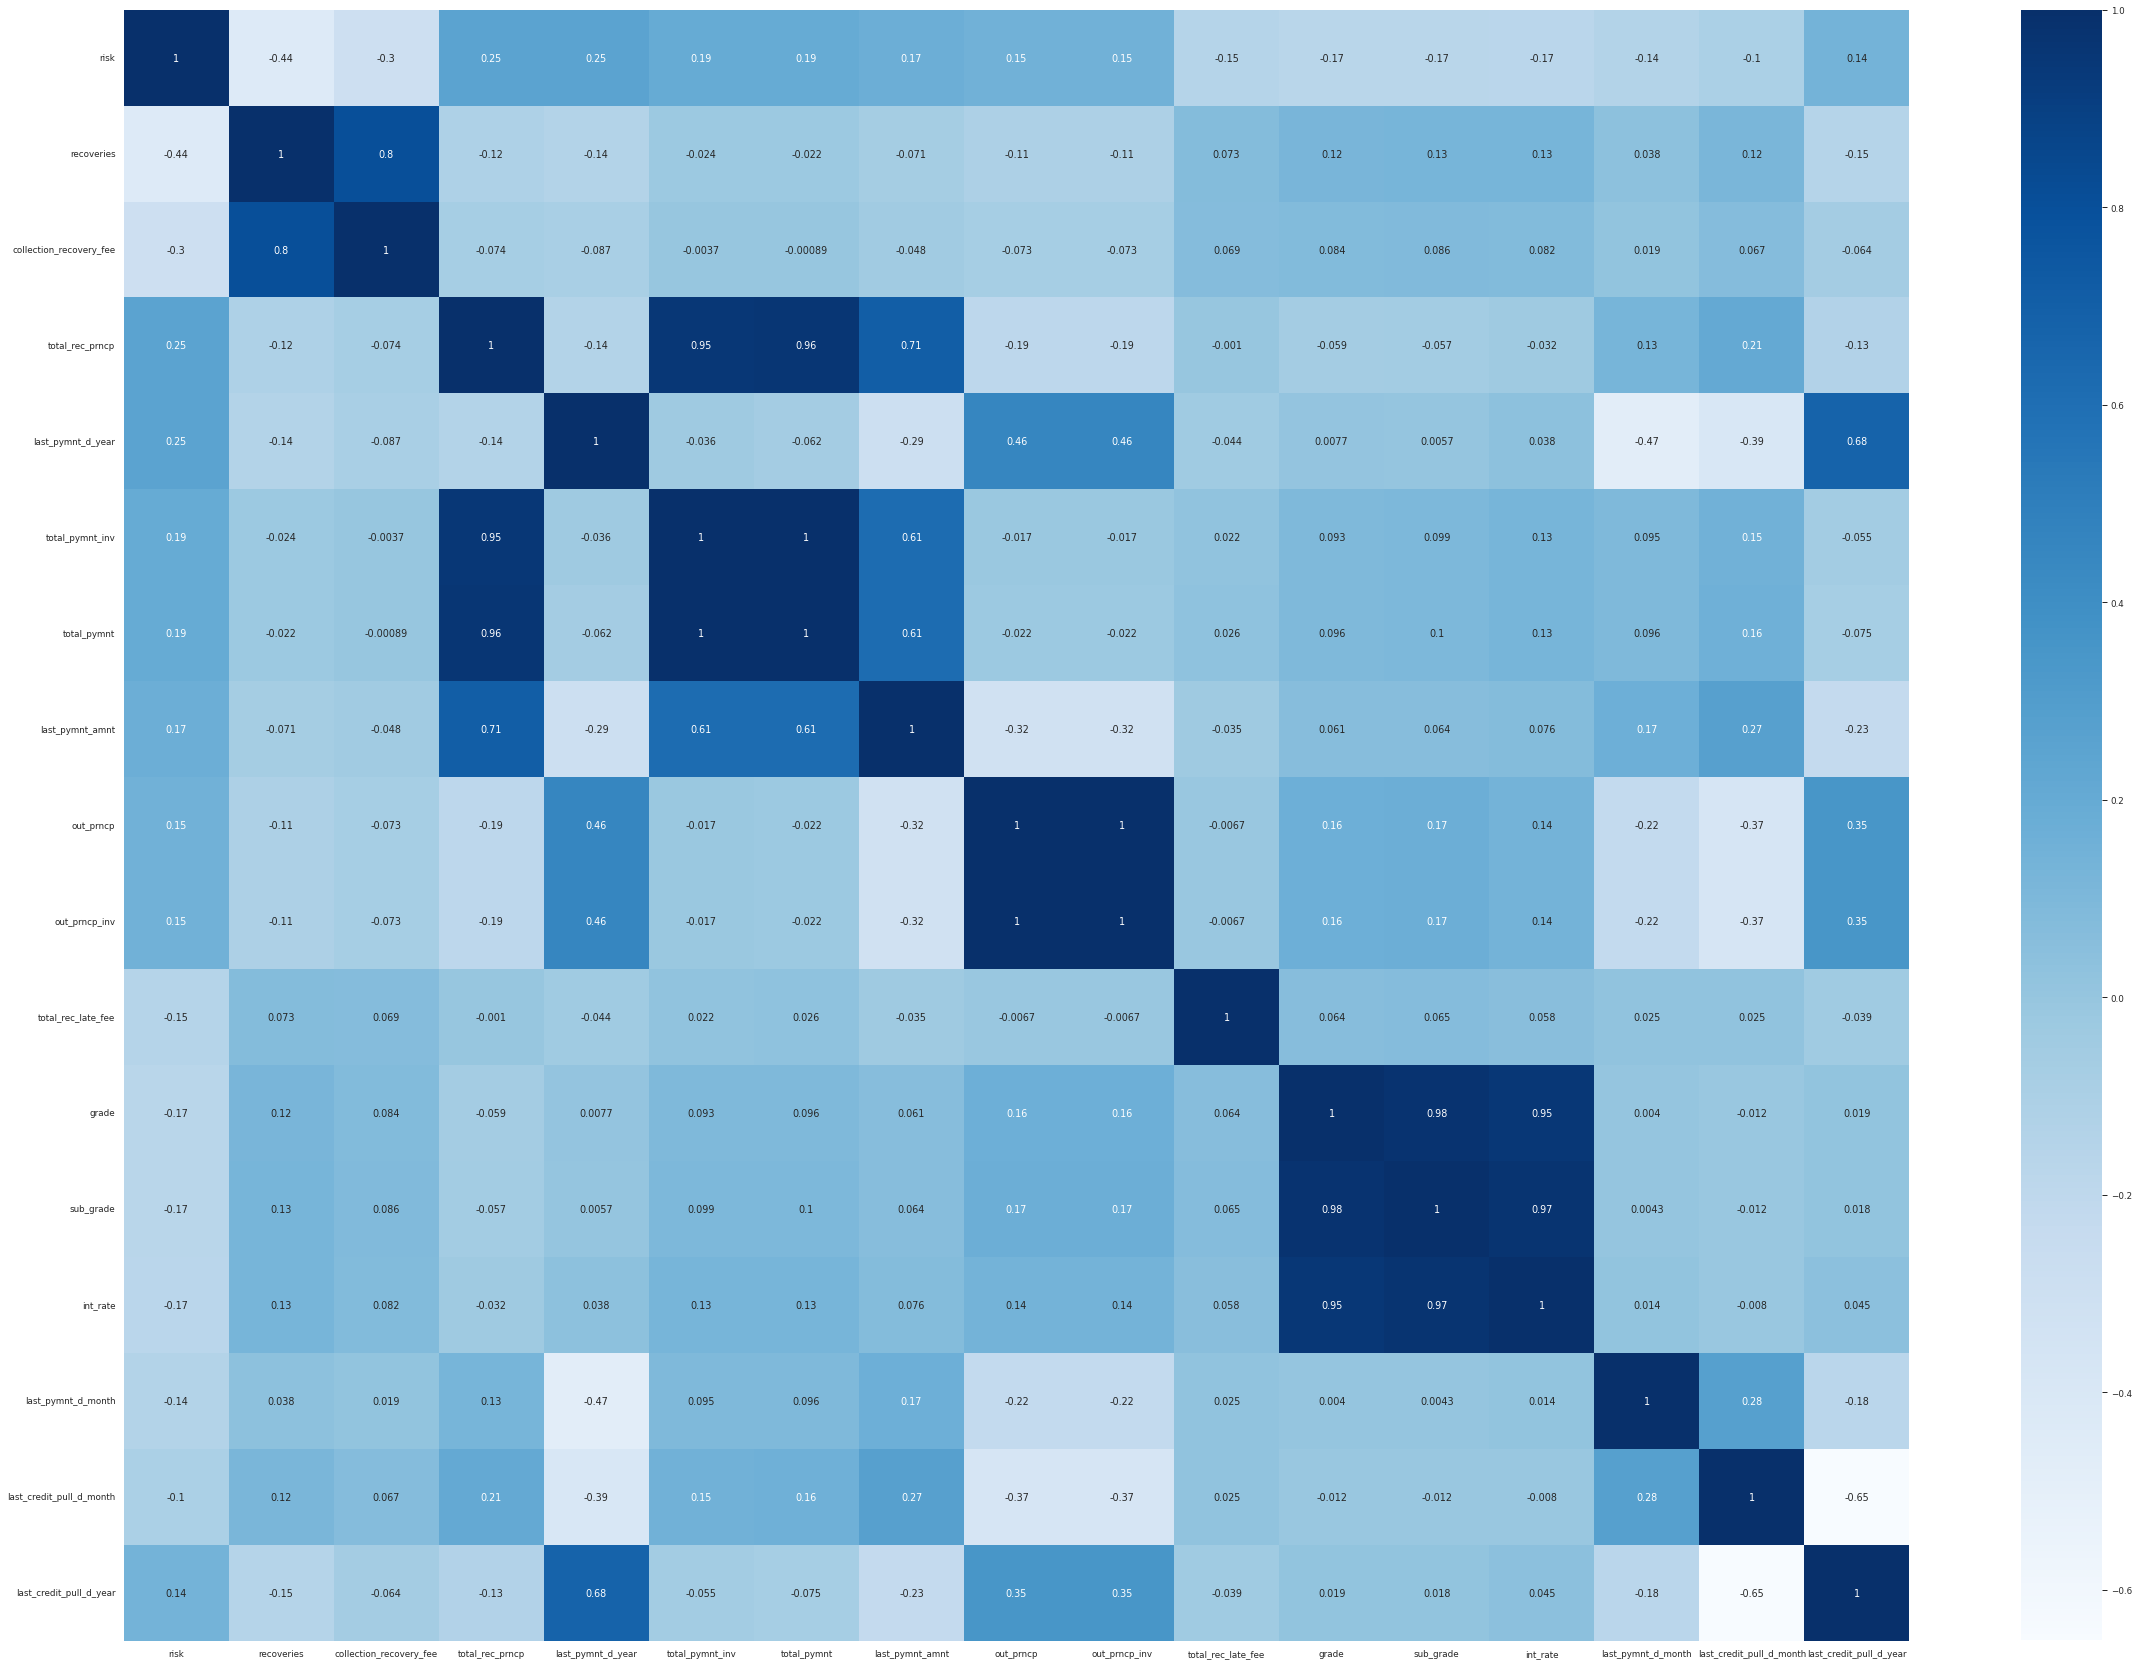

In [134]:
# let's only include the features mentioned above
fig = plt.figure(figsize = (40,30))
corr_data = concatenated_data[['risk', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp' , 'last_pymnt_d_year', 
                               'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 
                               'total_rec_late_fee', 'grade', 'sub_grade', 'int_rate', 'last_pymnt_d_month',
                              'last_credit_pull_d_month', 'last_credit_pull_d_year']]
sns.heatmap(corr_data.corr(),cmap='Blues', annot = True);

### Handling Imbalanced Data

In [135]:
# define X and y
X = corr_data.drop(['risk'], axis=1) #features
y = corr_data['risk'] #target

The risk status is highly imbalanced, with 11% Bad Risk and 88% Good Risk. That's why it requires resampling.

**Note**: When apply machine learning algorithms with imbalanced data, the model obtained will be more biased towards the majority classes. It means the model will predict the majority classes instead of the minority classes.

In [136]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) # good risk
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) # bad risk
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X, y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

Before OverSampling, counts of label '1': 414099
Before OverSampling, counts of label '0': 52186 

After OverSampling, the shape of train_X: (828198, 16)
After OverSampling, the shape of train_y: (828198,) 

After OverSampling, counts of label '1': 414099
After OverSampling, counts of label '0': 414099


### Data Splitting

I will split the data into training set and testing set with proportion of 80:20.

In [137]:
from sklearn.model_selection import train_test_split

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X_balanced_res, y_balanced_res, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(662558, 16) (165640, 16)


### Normalization

Normalization is important because the features have different range of value. 

**Note**: Features that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

In [138]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data for numerical stability
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Machine Learning Techniques

Here are some algorithms that will be tested to determine the best model to predict credit risk:
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. K-Nearest Neighbor
5. Gaussian Naive Bayes
6. MLP Classifier (Neural Network)
7. XGBoost Classifier
8. Gradient Boosting Classifier

In [139]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [140]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting
from xgboost import XGBClassifier #xgboost
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

#### 1. Decision Tree

In [141]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


##### Performance of Training Model

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



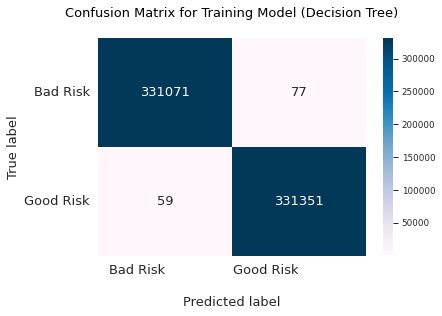

In [142]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of decision tree algorithms has a very high accuracy value.


Based on **confusion matrix**, it observed that:
- The classifier made a total of 662,558 predictions. But only 662,422 of them were predicted correctly.
- The classifier predicted bad risk 331,130 times and good risk 331,428 times. In reality, risk status in the sample has 331,148 bad risk and 331,410 good risk.
- The bad risk class and the good risk class are both the best-classified classes. The decision tree model classified almost 100% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     82951
           1       0.99      0.98      0.98     82689

    accuracy                           0.98    165640
   macro avg       0.98      0.98      0.98    165640
weighted avg       0.98      0.98      0.98    165640



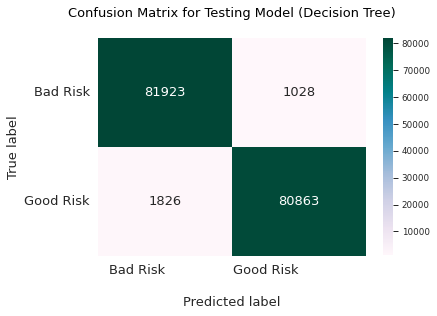

In [143]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of decision tree algorithms has a very high accuracy value.


Based on **confusion matrix**, it observed that:
- The classifier made a total of 165,640 predictions. But only 162,751 of them were predicted correctly.
- The classifier predicted bad risk 83,768 times and good risk 81,872 times. In reality, risk status in the sample has 82,951 bad risk and 82,689 good risk.
- The bad risk class and the good risk class are the best-classified classes. However, the bad risk class is slightly better than the good risk class, the model classified 99% of them correctly.

In [144]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.98 %
Testing Accuracy: 98.28 %


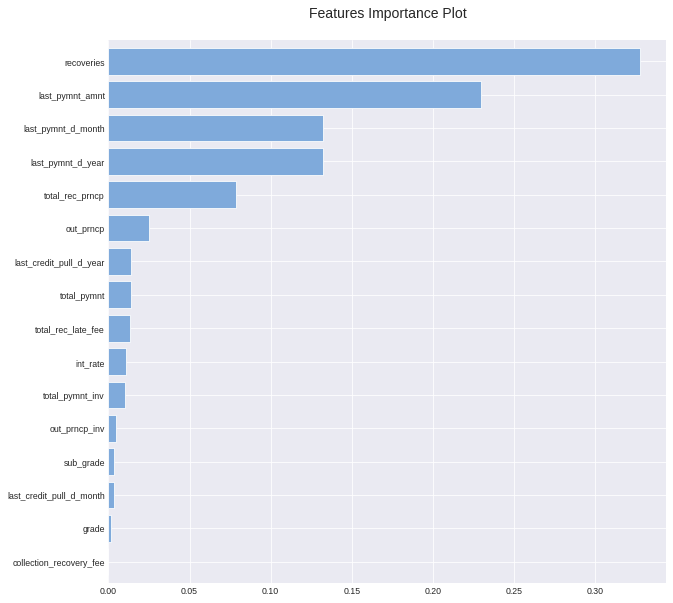

In [145]:
# important features
importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_dt.plot(kind ='barh', color='#7faadb', width=0.8)
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature dt.png')

The plot above confirms that the five most important features are recoveries value, last payment amount, last payment year, last payment month, and total principal received.

#### 2. Random Forest

In [146]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


##### Performance of Training Model

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



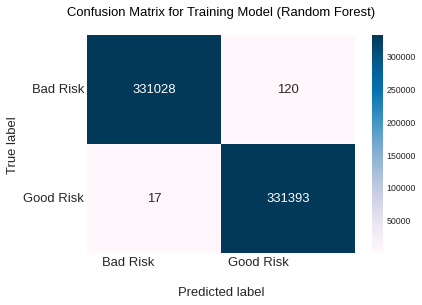

In [147]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of random forest algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 662,558 predictions. But only 662,421 of them were predicted correctly.
- The classifier predicted bad risk 331,039 times and good risk 331,519 times. In reality, risk status in the sample has 331,148 bad risk and 331,410 good risk.
- The bad risk class and the good risk class are both the best-classified classes. The random forest model classified almost 100% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



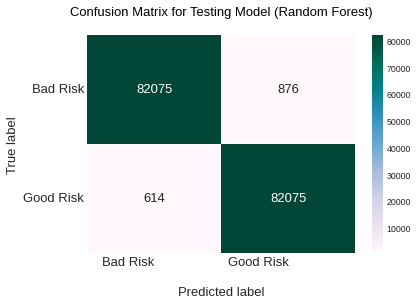

In [148]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of random forest algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 165,640 predictions. But only 164,148 of them were predicted correctly.
- The classifier predicted bad risk 82,679 times and good risk 82,931 times. In reality, risk status in the sample has 82,951 bad risk and 82,689 good risk.
- The bad risk class and the good risk class are the best-classified classes. The random forest model classified 99% of them correctly.

In [149]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.98 %
Test Accuracy: 99.1 %


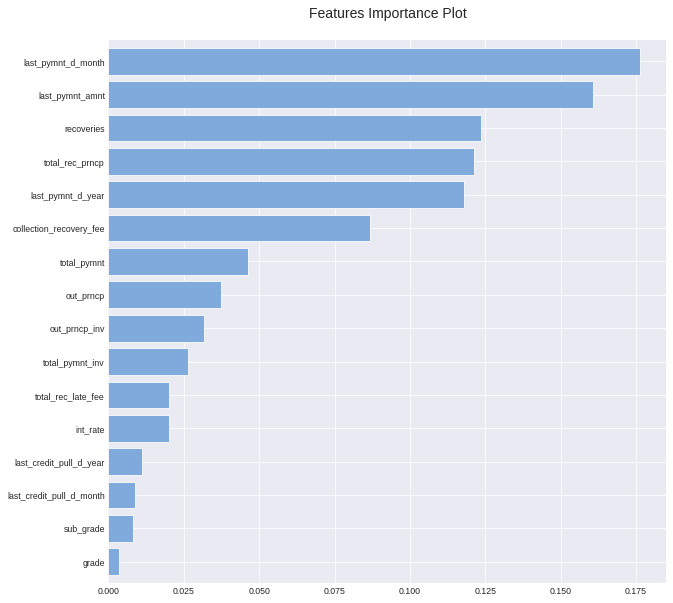

In [150]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color='#7faadb', width=0.8)
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

The plot above confirms that the five most important features are 
- `last_pymnt_d_month` is month of last payment was received.
- `last_pymnt_amnt` is last total payment amount received.
- `total_rec_prncp` is total principal received to date.
- `recoveries` is post charge off gross recovery.
- `last_pymnt_d_year` is year of last payment was received.

#### 3. Logistic Regression

In [151]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


##### Performance of Training Model

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.88      0.88    331148
           1       0.88      0.89      0.88    331410

    accuracy                           0.88    662558
   macro avg       0.88      0.88      0.88    662558
weighted avg       0.88      0.88      0.88    662558



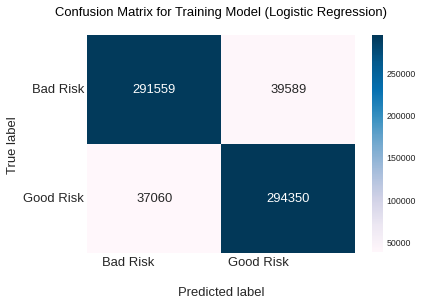

In [152]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of logistic regression algorithms has a high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 662,558 predictions. But only 585,599 of them were predicted correctly.
- The classifier predicted bad risk 327,815 times and good risk 334,743 times. In reality, risk status in the sample has 331,148 bad risk and 331,410 good risk.
- The bad risk class and the good risk class are both the best-classified classes. However, the good risk class is slightly better than the bad risk class, the model classified 89% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     82951
           1       0.88      0.88      0.88     82689

    accuracy                           0.88    165640
   macro avg       0.88      0.88      0.88    165640
weighted avg       0.88      0.88      0.88    165640



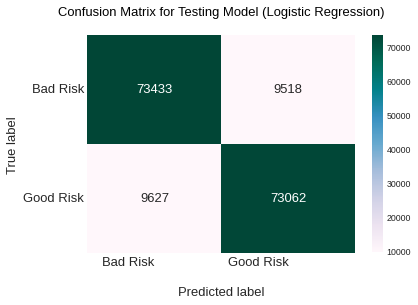

In [153]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of logistic regression algorithms has a high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 165,640 predictions. But only 146,444 of them were predicted correctly.
- The classifier predicted bad risk 83,009 times and good risk 82,731 times. In reality, risk status in the sample has 82,951 bad risk and 82,689 good risk.
- The bad risk class and the good risk class are the best-classified classes. The logistic regression model classified 88% of them correctly.

In [154]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 88.43 %
Test Accuracy: 88.44 %


#### 4. Naive Bayes

In [155]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


##### Performance of Training Model

Classification Report Training Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.99      0.51      0.67    331148
           1       0.67      0.99      0.80    331410

    accuracy                           0.75    662558
   macro avg       0.83      0.75      0.74    662558
weighted avg       0.83      0.75      0.74    662558



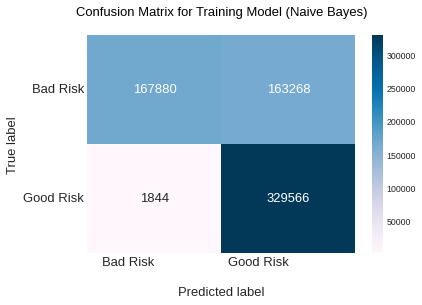

In [156]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Naive Bayes)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of naive bayes algorithms has a medium accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 662,558 predictions. But only 329,566 of them were predicted correctly.
- The classifier predicted bad risk 169,724 times and good risk 492,832 times. In reality, risk status in the sample has 331,148 bad risk and 331,410 good risk.
- The good risk class is the best-classified class. The naive bayes model classified 99% of them correctly. However, the model can only correctly classified 51% of the bad risk class. More errors were made by predicting a bad risk as a good risk.

##### Performance of Testing Model

Classification Report Testing Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.99      0.50      0.67     82951
           1       0.67      1.00      0.80     82689

    accuracy                           0.75    165640
   macro avg       0.83      0.75      0.73    165640
weighted avg       0.83      0.75      0.73    165640



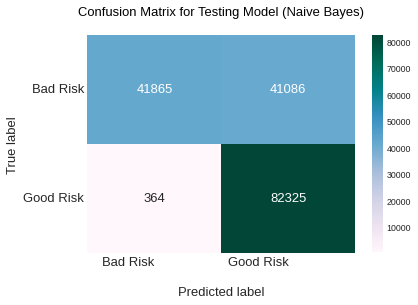

In [157]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Naive Bayes)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of naive bayes algorithms has a medium accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 165,640 predictions. But only 124,190 of them were predicted correctly.
- The classifier predicted bad risk 42,229 times and good risk 123,411 times. In reality, risk status in the sample has 82,951 bad risk and 82,689 good risk.
- The good risk class is the best-classified class. The naive bayes model classified almost 100% of them correctly. However, the model can only correctly classified 50% of the bad risk class. More errors were made by predicting a bad risk as a good risk.

In [158]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gnb_train))
print("Test Accuracy: {} %".format(acc_gnb_test))

Training Accuracy: 75.08 %
Test Accuracy: 74.98 %


#### 5. K-Nearest Neighbors

In [159]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


##### Performance of Training Model

Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    331148
           1       0.98      0.97      0.98    331410

    accuracy                           0.98    662558
   macro avg       0.98      0.98      0.98    662558
weighted avg       0.98      0.98      0.98    662558



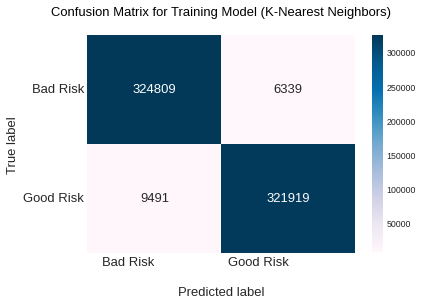

In [160]:
# predict data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (K-Nearest Neighbors)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of k-nearest neighbors algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 662,558 predictions. But only 646,728 of them were predicted correctly.
- The classifier predicted bad risk 334,300 times and good risk 328,258 times. In reality, risk status in the sample has 331,148 bad risk and 331,410 good risk.
- The bad risk class and the good risk class are both the best-classified classes. However, the bad risk class is slightly better than the good risk class, the k-nearest neighbors model classified 98% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     82951
           1       0.97      0.96      0.97     82689

    accuracy                           0.97    165640
   macro avg       0.97      0.97      0.97    165640
weighted avg       0.97      0.97      0.97    165640



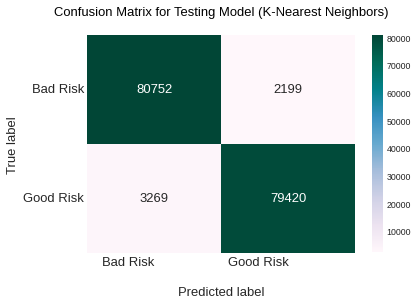

In [161]:
# predict data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (K-Nearest Neighbors)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of k-nearest neighbors algorithms has a medium accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 165,640 predictions. But only 160,172 of them were predicted correctly.
- The classifier predicted bad risk 84,021 times and good risk 81,619 times. In reality, risk status in the sample has 82,951 bad risk and 82,689 good risk.
- The bad risk class and the good risk class are both the best-classified classes. However, the bad risk class is slightly better than the good risk class, the k-nearest neighbors model classified 97% of them correctly.

In [162]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_knn_train))
print("Test Accuracy: {} %".format(acc_knn_test))

Training Accuracy: 97.61 %
Test Accuracy: 96.7 %


#### 6. MLP Classifier (Neural Network)

In [163]:
# train the model
mlp_model = MLPClassifier().fit(X_train, y_train)

##### Performance of Training Model

Classification Report Training Model (MLP Classifier):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    331148
           1       0.98      1.00      0.99    331410

    accuracy                           0.99    662558
   macro avg       0.99      0.99      0.99    662558
weighted avg       0.99      0.99      0.99    662558



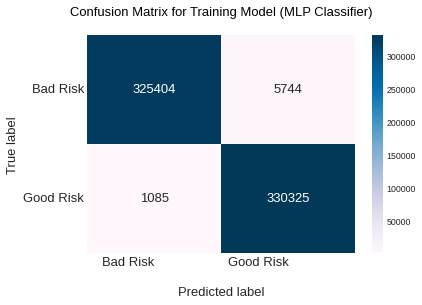

In [164]:
# predict data train
y_train_pred_mlp = mlp_model.predict(X_train)

# print classification report
print('Classification Report Training Model (MLP Classifier):')
print(classification_report(y_train, y_train_pred_mlp))

# form confusion matrix as a dataFrame
confusion_matrix_mlp = pd.DataFrame((confusion_matrix(y_train, y_train_pred_mlp)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_mlp, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (MLP Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of neural network algorithms has a medium accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 662,558 predictions. But only 655,285 of them were predicted correctly.
- The classifier predicted bad risk 325,395 times and good risk 337,163 times. In reality, risk status in the sample has 331,148 bad risk and 331,410 good risk.
- The good risk class is the best-classified class. The neural network model classified almost 100% of them correctly.
- More errors were made by predicting a bad risk as a good risk.

##### Performance of Testing Model

Classification Report Testing Model (MLP Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



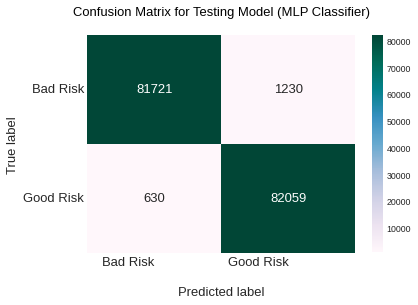

In [165]:
# predict data test
y_test_pred_mlp = mlp_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (MLP Classifier):')
print(classification_report(y_test, y_test_pred_mlp))

# form confusion matrix as a dataFrame
confusion_matrix_mlp = pd.DataFrame((confusion_matrix(y_test, y_test_pred_mlp)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_mlp, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (MLP Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of neural network algorithms has a medium accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 165,640 predictions. But only 163,955 of them were predicted correctly.
- The classifier predicted bad risk 81,914 times and good risk 83,729 times. In reality, risk status in the sample has 82,951 bad risk and 82,689 good risk.
- The good risk class is the best-classified class. The neural network model classified almost 100% of them correctly.
- More errors were made by predicting a bad risk as a good risk.

In [166]:
acc_mlp_train=round(mlp_model.score(X_train,y_train)*100,2)
acc_mlp_test=round(mlp_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

Training Accuracy: 98.97 %
Test Accuracy: 98.88 %


#### 7. XGBoost Classifier

In [167]:
# train the model
xgb_model = XGBClassifier().fit(X_train, y_train)

##### Performance of Training Model

Classification Report Training Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    331148
           1       0.99      1.00      0.99    331410

    accuracy                           0.99    662558
   macro avg       0.99      0.99      0.99    662558
weighted avg       0.99      0.99      0.99    662558



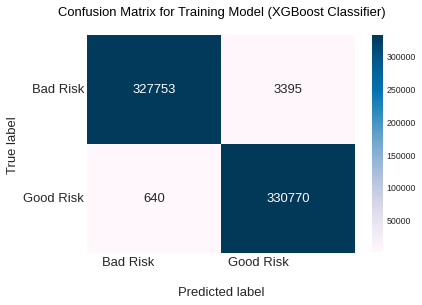

In [168]:
# predict data train
y_train_pred_xgb = xgb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (XGBoost Classifier):')
print(classification_report(y_train, y_train_pred_xgb))

# form confusion matrix as a dataFrame
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_xgb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (XGBoost Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of XGBoost algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 662,558 predictions. But only 658,523 of them were predicted correctly.
- The classifier predicted bad risk 328,393 times and good risk 334,165 times. In reality, risk status in the sample has 331,148 bad risk and 331,410 good risk.
- The bad risk class and the good risk class are both the best-classified classes. However, the bad risk class is slightly better than the good risk class, the XGBoost model classified almost 100% of them correctly.
- More errors were made by predicting a bad risk as a good risk.

##### Performance of Testing Model

Classification Report Testing Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



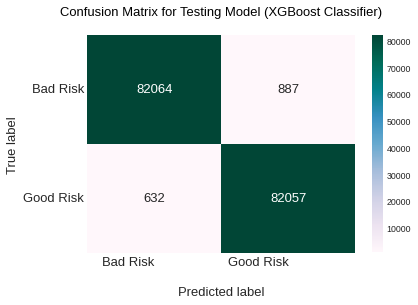

In [169]:
# predict data test
y_test_pred_xgb = xgb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (XGBoost Classifier):')
print(classification_report(y_test, y_test_pred_xgb))

# form confusion matrix as a dataFrame
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_xgb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (XGBoost Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of XGBoost algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 165,640 predictions. But only 164,121 of them were predicted correctly.
- The classifier predicted bad risk 82,696 times and good risk 82,944 times. In reality, risk status in the sample has 82,951 bad risk and 82,689 good risk.
- The bad risk class and the good risk class are both the best-classified classes.The XGBoost model classified 99% of them correctly.

In [170]:
acc_xgb_train=round(xgb_model.score(X_train,y_train)*100,2)
acc_xgb_test=round(xgb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_xgb_train))
print("Test Accuracy: {} %".format(acc_xgb_test))

Training Accuracy: 99.39 %
Test Accuracy: 99.08 %


#### 8. Gradient Boosting Classifier

In [171]:
# train the model
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

##### Performance of Training Model

Classification Report Training Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    331148
           1       0.98      0.97      0.98    331410

    accuracy                           0.98    662558
   macro avg       0.98      0.98      0.98    662558
weighted avg       0.98      0.98      0.98    662558



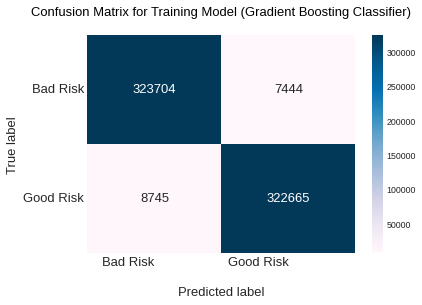

In [172]:
# predict data train
y_train_pred_gb = gb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gradient Boosting Classifier):')
print(classification_report(y_train, y_train_pred_gb))

# form confusion matrix as a dataFrame
confusion_matrix_gb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Gradient Boosting Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of gradient boosting algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 662,558 predictions. But only 646,369 of them were predicted correctly.
- The classifier predicted bad risk 332,449 times and good risk 330,109 times. In reality, risk status in the sample has 331,148 bad risk and 331,410 good risk.
- The bad risk class and the good risk class are both the best-classified classes. However, the bad risk class is slightly better than the good risk class, the gradient boosting model classified 98% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     82951
           1       0.98      0.97      0.98     82689

    accuracy                           0.98    165640
   macro avg       0.98      0.98      0.98    165640
weighted avg       0.98      0.98      0.98    165640



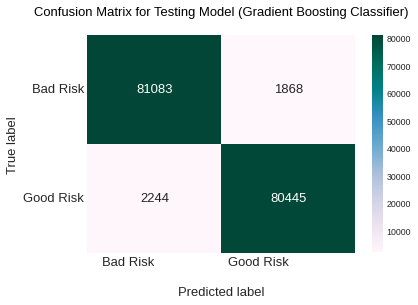

In [173]:
# predict data test
y_test_pred_gb = gb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gradient Boosting Classifier):')
print(classification_report(y_test, y_test_pred_gb))

# form confusion matrix as a dataFrame
confusion_matrix_gb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Gradient Boosting Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of gradient boosting algorithms has a medium accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 165,640 predictions. But only 161,528 of them were predicted correctly.
- The classifier predicted bad risk 83,327 times and good risk 82,313 times. In reality, risk status in the sample has 82,951 bad risk and 82,689 good risk.
- The bad risk class and the good risk class are both the best-classified classes. However, the bad risk class is slightly better than the good risk class, the gradient boosting model classified 98% of them correctly.

In [174]:
acc_gb_train=round(gb_model.score(X_train,y_train)*100,2)
acc_gb_test=round(gb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gb_train))
print("Test Accuracy: {} %".format(acc_gb_test))

Training Accuracy: 97.56 %
Test Accuracy: 97.52 %


### Model Comparison

The results will be evaluated and compared by looking at the accuracy value of each model. The accuracy value is the ratio of the number of correct predictions to the total number of input samples. I want the accuracy or correct prediction as high as possible. The following is the accuracy value of each model.

In [175]:
results = pd.DataFrame([["Decision Tree", acc_dt_train, acc_dt_test],["Random Forest", acc_rf_train, acc_rf_test], 
                        ["Logistic Regression", acc_log_train, acc_log_test], ["K-Nearest Neighbor", acc_knn_train, acc_knn_test],
                       ["Naive Bayes", acc_gnb_train, acc_gnb_test], ["MLP Classifier", acc_mlp_train, acc_mlp_test],
                        ["XGBoost  Classifier", acc_xgb_train, acc_xgb_test], ["Gradient Boosting Classifier", acc_gb_train, acc_gb_test]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Training Accuracy Score,Testing Accuracy Score
1,Random Forest,99.980000,99.100000
0,Decision Tree,99.980000,98.280000
6,XGBoost Classifier,99.390000,99.080000
5,MLP Classifier,98.970000,98.880000
3,K-Nearest Neighbor,97.610000,96.700000
7,Gradient Boosting Classifier,97.560000,97.520000
2,Logistic Regression,88.430000,88.440000
4,Naive Bayes,75.080000,74.980000


## Conclusion

1. It concluded that the **random forest** model is the best model to predict the loan risk status of the applicants.
    - Compared to the decision tree models, which have the same high accuracy values in the training set. The difference in accuracy between training and testing sets on the random forest model is smaller than in the decision tree model.
    - Although, the XGBoost classifier also has very high accuracy values, and the difference is smaller than the random forest model. The random forest model seems not only to perform better on the training set but also the testing set. That means the random forest model has a better generalization than the XGBoost classifier model.
    
2. The most important features in determining whether an applicant is likely to not repay their loan are the **last payment month**, the **last payment amount**, the **total principal received**, the **recovery value**, and the **last payment year**. The company needs to monitor these indicators to reduce the risk of loss.
    - In the future, If there are applicants with those indicators, then the company can take action such as rejecting their loan, reducing the amount of the loan, or lending at a higher interest rate to avoid and reduce the total loss suffered by the company.